# Telecom Churn Case Study

Submitted by:  
&emsp;    1. Neeraj Kumar  
&emsp;    2. Trupti Jagtap  
&emsp;    3. Swapnil Shrungare  
&emsp;    4. Syed Suhaib Mustafa  

In [1]:
## This notebook is Tested with below versions of pandas and numpy
## !pip install pandas==0.23.4
## !pip install numpy==1.15.4
## !pip install imblearn
## !pip install xgboost

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

In [4]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

In [5]:
# resample
from sklearn.utils import resample

In [6]:
# modelling
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from numpy import set_printoptions

# Load Data

In [7]:
# Read the given CSV file, and view some sample records
df = pd.read_csv("telecom_churn_data.csv")
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6     ...      sachet_3g_9  fb_user_6  \
0            9/30/2014  197.385     ...                0        1.0   
1            9/30/2014   34.047     ...                0        NaN   
2            9/30/2014  167.690     ...                0        NaN   
3            9/30/2014  221.338     ...                0        NaN   
4            9/30/2014  261.636     ...                0        0.0   

   fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0        1.0        1.0        NaN   968        30.4         0.0      101.20   
1        1.0        1.0        NaN  1006         0.0         0.0        0.00   
2        NaN        NaN        1.0  1103         0.0         0.0        4.17   
3        NaN        NaN        NaN  2491         0.0         0.0        0.00   
4        NaN        NaN        NaN  1526         0.0         0.0        0.00   

   sep_vbc_3g  
0        3.58  
1        0.00  
2        0.00  
3        0.00  
4        0.00  

[5 rows x 226 columns]

# Data Exploration

In [8]:
# Data summary
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6      ...        sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000      ...       99999.000000  25153.000000  25571.000000   
mean     132.395875      ...           0.084581      0.914404      0.908764   
std      297.207406      ...           0.650457      0.279772      0.287950   
min        0.000000      ...           0.000000      0.000000      0.000000   
25%        7.380000      ...           0.000000      1.000000      1.000000   
50%       34.310000      ...           0.000000      1.000000      1.000000   
75%      118.740000      ...           0.000000      1.000000      1.000000   
max     7376.710000      ...          49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [9]:
# inspect the structure etc.
print(df.info(), "\n")
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None 

(99999, 226)


So, wo have 99999 entries with 226 features. Lets check if there are any mis-named columns. As mentioned all columns will have 6,7,8 or 9 suffix except few columns like mobile_number etc.

# Data Preparation
#####  Data Preprocessing EDA and new features derivation

In [10]:
# list all columns not ending with 6,7,8,or 9.
df.filter(regex='^((?![6789]).)*$').head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0   968        30.4         0.0      101.20        3.58  
1  1006         0.0         0.0        0.00        0.00  
2  1103         0.0         0.0        4.17        0.00  
3  2491         0.0         0.0        0.00        0.00  
4  1526         0.0         0.0        0.00        0.00

last 4 Columns have month name prefixed but the standard followed here is to suffix the month number, hence we will rename them accordingly. We can also see that by list columns using list(df) few column have rch in the name instead of rech which referrs to recharge, lets rename those as well.

In [11]:
# rename the above columns
df = df.rename(columns={"last_day_rch_amt_6": "last_day_rech_amt_6", "last_day_rch_amt_8": "last_day_rech_amt_8", "last_day_rch_amt_7": "last_day_rech_amt_7", "last_day_rch_amt_9": "last_day_rech_amt_9", "jun_vbc_3g": "vbc_3g_6", "jul_vbc_3g": "vbc_3g_7", "aug_vbc_3g": "vbc_3g_8", "sep_vbc_3g": "vbc_3g_9"})

**Filtering high value customers**

Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).  

From the average rech_amt_data and total_rech_data for each month calculate the total recharge done for data
 
 $$average=totalAmout \div numOfRecharges$$
 
 $$totalAmout=average * numOfRecharges$$
 
 using this formula we calculate the total recharge amount for data for each month
 
 Then we can combine the total recharge amount for that month with the above calculated total recharge of data for each month into one column to get the total recharge done for a month.
 

In [12]:
cols = ['total_rech_data_6', 'av_rech_amt_data_6', 'date_of_last_rech_data_6', 'vol_2g_mb_6','vol_3g_mb_6', 'total_rech_data_7', 'av_rech_amt_data_7', 'date_of_last_rech_data_7', 'vol_2g_mb_7','vol_3g_mb_7', 'total_rech_amt_6', 'total_rech_amt_7']
print(df[cols].isnull().sum()/df.shape[0] *100)

total_rech_data_6           74.846748
av_rech_amt_data_6          74.846748
date_of_last_rech_data_6    74.846748
vol_2g_mb_6                  0.000000
vol_3g_mb_6                  0.000000
total_rech_data_7           74.428744
av_rech_amt_data_7          74.428744
date_of_last_rech_data_7    74.428744
vol_2g_mb_7                  0.000000
vol_3g_mb_7                  0.000000
total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
dtype: float64


from the above missing value information we can see that for 6th month the missing value is exactly same for data recharge amount, number of recharges, last date of recharge. Since there is no missing data for the categorical feature volume of 2G and 3G used in MB and the monthly packages for 3G and 2G, lets analyse them next.

In [13]:
# find how many zeros in below categorical features
print("count of zeros vol_2g_mb_6: {}".format(((len(df[df['vol_2g_mb_6'] ==0]))/df.shape[0] *100)))
print("count of zeros vol_3g_mb_6: {}".format(((len(df[df['vol_3g_mb_6'] ==0]))/df.shape[0] *100)))
print("count of zeros vol_2g_mb_7: {}".format(((len(df[df['vol_2g_mb_7'] ==0]))/df.shape[0] *100)))
print("count of zeros vol_3g_mb_7: {}".format(((len(df[df['vol_3g_mb_7'] ==0]))/df.shape[0] *100)))


count of zeros vol_2g_mb_6: 77.73177731777318
count of zeros vol_3g_mb_6: 85.41785417854179
count of zeros vol_2g_mb_7: 77.47477474774747
count of zeros vol_3g_mb_7: 84.57884578845788


So this tells us that 77% percent of the users have not used 2G data and 84% of users have not used 3G data. From this we can assume that the missing data for data_rech is actually 0 i.e.; user has not recharged at all. Lets impute these missing value for the fields in the next step.

In [14]:
# av_rech_amt_data has lot of nan values, lets impute them with 0 so that we can calculate the right average.
cols = ['total_rech_data_6', 'total_rech_data_7', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'total_rech_amt_6', 'total_rech_amt_7']
df[cols] = df[cols].fillna(value=0)
print(df[cols].isnull().sum()/df.shape[0] *100)

total_rech_data_6     0.0
total_rech_data_7     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
dtype: float64


In [15]:
# treat the missing values for the month 8th and 9th for high value customers also.
cols = ['total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'total_rech_amt_8', 'total_rech_amt_9']
print(df[cols].isnull().sum()/df.shape[0] *100, "\n")
df[cols] = df[cols].fillna(value=0)
print(df[cols].isnull().sum()/df.shape[0] *100)

total_rech_data_8     73.660737
total_rech_data_9     74.077741
av_rech_amt_data_8    73.660737
av_rech_amt_data_9    74.077741
total_rech_amt_8       0.000000
total_rech_amt_9       0.000000
dtype: float64 

total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
dtype: float64


In [16]:
# use above mentioned formula to find the total recharge amount
df['total_rech_data_amt_6'] = df['av_rech_amt_data_6']*df['total_rech_data_6']
df['total_rech_data_amt_7'] = df['av_rech_amt_data_7']*df['total_rech_data_7']
df['total_rech_data_amt_8'] = df['av_rech_amt_data_8']*df['total_rech_data_8']
df['total_rech_data_amt_9'] = df['av_rech_amt_data_9']*df['total_rech_data_9']

df['total_rech_6'] = df['total_rech_data_amt_6'] + df["total_rech_amt_6"]
df['total_rech_7'] = df['total_rech_data_amt_7'] + df["total_rech_amt_7"]
df['total_rech_8'] = df['total_rech_data_amt_8'] + df["total_rech_amt_8"]
df['total_rech_9'] = df['total_rech_data_amt_9'] + df["total_rech_amt_9"]

# calculate average of 6th and 7th month data for filtering high value customer by taking avarage of 6th and 7th month recharge data and filtering using 70th percentile value
df['avg_rech_amt_6_7'] = (df["total_rech_6"] + df["total_rech_7"]) / 2.0

In [17]:
# check for outliers
df['avg_rech_amt_6_7'].describe(percentiles=[.95,.99,.997,.998,.999])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
50%        275.000000
95%       1512.000000
99%       3363.510000
99.7%     6090.593000
99.8%     7382.570000
99.9%    10415.707000
max      61236.000000
Name: avg_rech_amt_6_7, dtype: float64

In [18]:
# depending of model accuracy lets take a call on whether to drop ouliers or not. Since they are high value customer, we want to keep them.
len(df[df.avg_rech_amt_6_7 > np.quantile(df['avg_rech_amt_6_7'],0.999)])
# this step will drop ~200 rows. above 99.8 percentile are 200 rows
df = df[df.avg_rech_amt_6_7 <= np.quantile(df['avg_rech_amt_6_7'],0.999)]

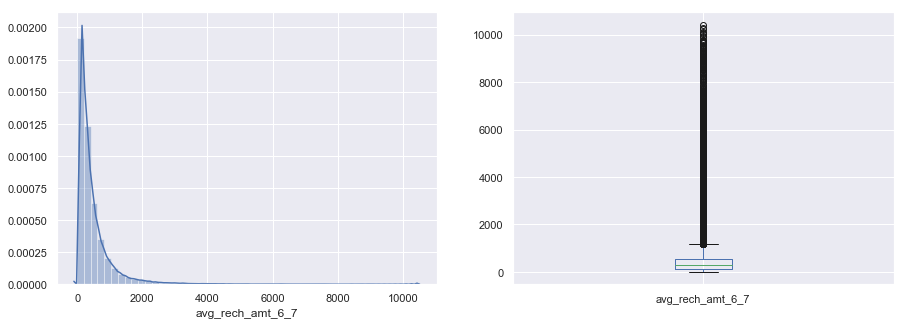

In [19]:
#let see the distplot for the average recharge amount we just calculated
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(15, 5))
sns.distplot(df['avg_rech_amt_6_7'], ax=ax1)
boxplot = df.boxplot(column=['avg_rech_amt_6_7'], ax=ax2)

Huge difference in max and mean values 99 percentile value is also as low as 3k where as max value is 61k. From distplot also we can see that major chunk of data is on the left side. We can fix the outliers, but since this is feature that identifies high value customers lets not drop them.

In [20]:
corr_df_6 = df[['total_rech_data_amt_6','total_rech_amt_6','avg_rech_amt_6_7']]
corr_df_7 = df[['total_rech_data_amt_7','total_rech_amt_7','avg_rech_amt_6_7']]
print("Correlation for 6th month: \n {}".format(corr_df_6.corr()))
print("\n Correlation for 7th month: \n {}".format(corr_df_7.corr()))

Correlation for 6th month: 
                        total_rech_data_amt_6  total_rech_amt_6  \
total_rech_data_amt_6               1.000000          0.202863   
total_rech_amt_6                    0.202863          1.000000   
avg_rech_amt_6_7                    0.744774          0.596816   

                       avg_rech_amt_6_7  
total_rech_data_amt_6          0.744774  
total_rech_amt_6               0.596816  
avg_rech_amt_6_7               1.000000  

 Correlation for 7th month: 
                        total_rech_data_amt_7  total_rech_amt_7  \
total_rech_data_amt_7               1.000000          0.216212   
total_rech_amt_7                    0.216212          1.000000   
avg_rech_amt_6_7                    0.773777          0.608061   

                       avg_rech_amt_6_7  
total_rech_data_amt_7          0.773777  
total_rech_amt_7               0.608061  
avg_rech_amt_6_7               1.000000  


As we can see from pairplot as well as the corr matrix there is natural correlation between data and amount recharge but high  correlation between average recharge amount and both the recharges.

#### Checking Outliers

In [21]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.989900e+04    99899.0         98883.0         98883.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.955676e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001204e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
90%     7.002173e+09      109.0             0.0             0.0   
95%     7.002291e+09      109.0             0.0             0.0   
99%     7.002387e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98883.0  99899.000000  99899.000000  99899.000000  99899.000000   
mean              0.0    281.381587    276.473878    277.601892    260.229152   
std               0.0    306.210308    304.144792    317.177402    311.704386   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.318000     86.913500     84.028500     62.596000   
50%               0.0    197.471000    191.400000    191.807000    176.668000   
75%               0.0    370.376500    364.661500    368.817000    352.825500   
90%               0.0    618.610600    615.408400    616.349800    599.970000   
95%               0.0    825.944400    823.708300    829.584200    802.274900   
99%               0.0   1392.330740   1405.047980   1442.029820   1393.336340   
max               0.0  11505.508000   7386.464000  19295.904000  15459.993000   

        onnet_mou_6        ...             vbc_3g_9  total_rech_data_amt_6  \
count  95965.000000        ...         99899.000000           99899.000000   
mean     132.337219        ...             3.257473             135.986278   
std      296.769434        ...            32.180913             544.281451   
min        0.000000        ...             0.000000               0.000000   
25%        7.380000        ...             0.000000               0.000000   
50%       34.330000        ...             0.000000               0.000000   
75%      118.740000        ...             0.000000               8.000000   
90%      344.078000        ...             0.000000             252.000000   
95%      612.320000        ...             0.480000             655.000000   
99%     1429.739200        ...            85.280600            2500.000000   
max     7376.710000        ...          2618.570000           17655.000000   

       total_rech_data_amt_7  total_rech_data_amt_8  total_rech_data_amt_9  \
count           99899.000000           99899.000000           99899.000000   
mean              156.146306             164.828139             143.268162   
std               616.664117             819.679280             763.875001   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                17.000000              23.000000              17.000000   
90%               288.000000             336.000000             274.000000   
95%               812.000000             819.000000             716.000000   
99%              2832.000000            2877.000000            2344.020000   
max             15390.000000           89106.500000          132510.000000   

       total_rech_6  total_rech_7  total_rech_8   total_rech_9  \
count  99899.000000  99899.000000  99899.000000   99899.000000   
mean     461.534582    476.613628    487.144678     444.908709   
std      716.334475    782.729637    973.990227     920.940847   
min        0.000000      0.000000      0.000000       0.000000   
25%      110.000000    11

We can fix the outliers, but since this is feature that identifies high value customers lets not drop them.

In [22]:
# drop all duplicate rows if they are present
df = df.drop_duplicates(keep="first")

In [23]:
# find all columns which are not having any variance
col_unique_entries = df.nunique(dropna=True)
col_unique_entries[col_unique_entries <2]

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
last_date_of_month_9    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_og_t2c_mou_9        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_9        1
dtype: int64

In [24]:
# drop all column which has only nan or one value which doesnt add any value to the data. features are usefull only if there is variance in it.
cols_to_drop = list(col_unique_entries[col_unique_entries <2].index)
df = df.drop(cols_to_drop, axis=1)

In [25]:
# filter high value customer by taking avarage of 6th and 7th month recharge data and filtering using 70th percentile value
new_df = df[df.avg_rech_amt_6_7 >= np.quantile(df['avg_rech_amt_6_7'],0.7)]
print("High values custmers: {}".format(len(new_df)))
print("70th percentile value: {}".format(np.quantile(df['avg_rech_amt_6_7'],0.7)))

High values custmers: 29987
70th percentile value: 476.5


In [26]:
# No missing value for churn prediction columns
cols=["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]
print(new_df[cols].isnull().sum()/new_df.shape[0] *100)

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64


In [27]:
# Tagging churners
X = new_df["total_ic_mou_9"] + new_df["total_og_mou_9"] + new_df["vol_2g_mb_9"] + new_df["vol_3g_mb_9"]
new_df['churn'] = np.where(X>1,0,1)
new_df['churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D86E0934E0>,
      dtype=object)

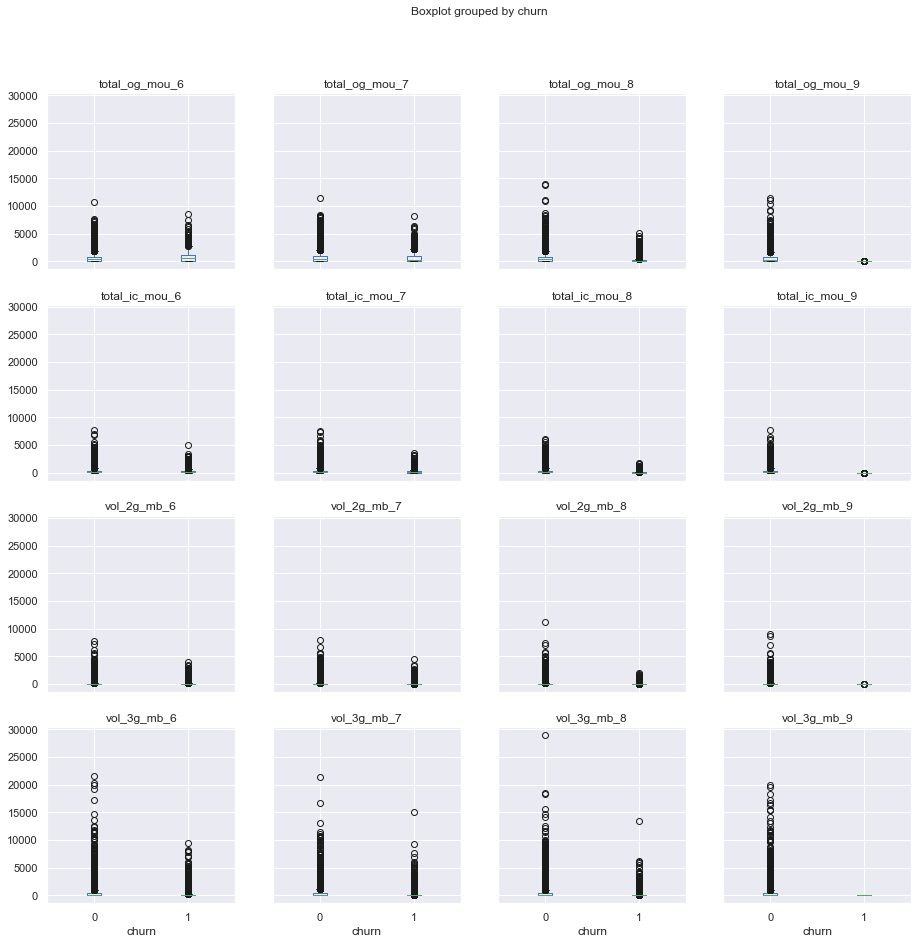

In [28]:
#churn_df = new_df[new_df.churn == 1]
#no_churn_df = new_df[new_df.churn == 0]
new_df.boxplot(column=['total_og_mou_6','total_og_mou_7','total_og_mou_8','total_og_mou_9', 
                       'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_ic_mou_9',
                       'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_2g_mb_9',
                       'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','vol_3g_mb_9'], by='churn', layout=(4, 4), figsize=(15,15))

From the box plot above we can see that for all the 3 features i.e. total outgoing/incoming minutes of usage and volume of 2G/3G in MB for the months 6&7(good phase) is almost the same and then next month 8(action phase) the box is reduced meaning the usage of customer is reduced significanly(by checking the density of the line) and for the month 9(churn phase) the box is almost negligible. This is a clear pattern for churning that the usage of outgoing, incoming as well as data is reducing.

In [29]:
# Drop all features of 9th month
churn_column=list(filter(lambda col:col.find("_9")!=-1,new_df.columns.values))
new_df = new_df.drop(churn_column, axis = 1)

In [30]:
#Derived features based on date of last recharge to get some insights on recharge pattern
new_df['date_of_last_rech_6'] = pd.to_datetime(new_df['date_of_last_rech_6'])
#new_df['weekmonth_last_rech_6'] = new_df['date_of_last_rech_6'].apply(lambda d: (d.day-1) // 7 + 1)
new_df['weekmonth_last_rech_6'] = new_df['date_of_last_rech_6'].dt.day-1
new_df['weekmonth_last_rech_6'] = (new_df['weekmonth_last_rech_6']//7)+1

new_df['date_of_last_rech_7'] = pd.to_datetime(new_df['date_of_last_rech_7'])
#new_df['weekmonth_last_rech_7'] = new_df['date_of_last_rech_7'].apply(lambda d: (d.day-1) // 7 + 1)
new_df['weekmonth_last_rech_7'] = new_df['date_of_last_rech_7'].dt.day-1
new_df['weekmonth_last_rech_7'] = (new_df['weekmonth_last_rech_7']//7)+1

new_df['date_of_last_rech_8'] = pd.to_datetime(new_df['date_of_last_rech_8'])
#new_df['weekmonth_last_rech_8'] = new_df['date_of_last_rech_8'].apply(lambda d: (d.day-1) // 7 + 1)
new_df['weekmonth_last_rech_8'] = new_df['date_of_last_rech_8'].dt.day-1
new_df['weekmonth_last_rech_8'] = (new_df['weekmonth_last_rech_8']//7)+1


#drop the old feature which are now converted and new derived features are created out of them
new_df = new_df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1)

C:\Users\nekumar5\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


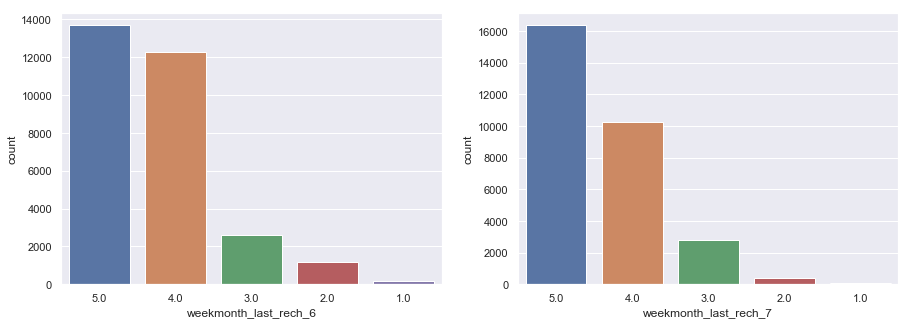

In [31]:
#count plot of recharges done on week of the month
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(15, 5))
sns.countplot(data = new_df, x='weekmonth_last_rech_6', ax=ax1, order = new_df['weekmonth_last_rech_6'].value_counts().index)
sns.countplot(data = new_df, x='weekmonth_last_rech_7', ax=ax2, order = new_df['weekmonth_last_rech_7'].value_counts().index)
fig.show()

The above countplot of weekdays and week of the month shows a clear pattern that last recharge is done mostly on the last weeks of the month. Also number of last amount recharges done on 1st or 2nd week is too less compared to 4th and 5th week. Since recharge is done mostly on month end, we can note this point that if we are releasing new pack or offer we should marktet and release the offer well before the 3rd week so that maximum of the users benefit from it.

#### Missing Value Treatment

In [32]:
# finding the missing value percentage
(new_df.isnull().sum()/new_df.shape[0] *100).sort_values(ascending =False)

date_of_last_rech_data_8    46.987028
fb_user_8                   46.987028
count_rech_3g_8             46.987028
max_rech_data_8             46.987028
arpu_3g_8                   46.987028
arpu_2g_8                   46.987028
night_pck_user_8            46.987028
count_rech_2g_8             46.987028
count_rech_2g_6             44.332544
arpu_2g_6                   44.332544
night_pck_user_6            44.332544
max_rech_data_6             44.332544
date_of_last_rech_data_6    44.332544
fb_user_6                   44.332544
arpu_3g_6                   44.332544
count_rech_3g_6             44.332544
date_of_last_rech_data_7    43.318771
fb_user_7                   43.318771
night_pck_user_7            43.318771
arpu_3g_7                   43.318771
max_rech_data_7             43.318771
arpu_2g_7                   43.318771
count_rech_2g_7             43.318771
count_rech_3g_7             43.318771
onnet_mou_8                  3.908360
og_others_8                  3.908360
spl_og_mou_8

In [33]:
# lets drop all the feautres having more than 40% of missing data. 
# It doesnt make sense to impute this since major chunk of data is missing
missing_values = (new_df.isnull().sum()/new_df.shape[0] *100)
new_df = new_df.drop(missing_values[missing_values>40].index,axis=1)

In [34]:
# finding the missing value percentage after dropping column having more than 40% missing values
(new_df.isnull().sum()/new_df.shape[0] *100).sort_values(ascending =False)

loc_og_t2c_mou_8         3.908360
spl_og_mou_8             3.908360
std_og_t2f_mou_8         3.908360
loc_ic_t2f_mou_8         3.908360
std_og_t2m_mou_8         3.908360
loc_ic_mou_8             3.908360
std_og_t2t_mou_8         3.908360
isd_og_mou_8             3.908360
loc_og_mou_8             3.908360
std_ic_t2t_mou_8         3.908360
loc_ic_t2t_mou_8         3.908360
std_ic_t2m_mou_8         3.908360
loc_og_t2f_mou_8         3.908360
loc_og_t2m_mou_8         3.908360
std_og_mou_8             3.908360
std_ic_t2f_mou_8         3.908360
loc_og_t2t_mou_8         3.908360
loc_ic_t2m_mou_8         3.908360
roam_og_mou_8            3.908360
std_ic_mou_8             3.908360
roam_ic_mou_8            3.908360
og_others_8              3.908360
offnet_mou_8             3.908360
spl_ic_mou_8             3.908360
onnet_mou_8              3.908360
ic_others_8              3.908360
isd_ic_mou_8             3.908360
weekmonth_last_rech_8    1.947511
loc_ic_mou_6             1.814119
std_ic_t2t_mou

In [35]:
#Lets analyse this nan vlaue month-wise
#lets take all columns which are null(which signifies incoming/outgoing calls) and compare it with the total incoming/outgoing
missing_values_cols_8 = ['total_ic_mou_8','total_og_mou_8','onnet_mou_8','offnet_mou_8','roam_ic_mou_8','roam_og_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_og_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_mou_8','isd_og_mou_8','spl_og_mou_8','og_others_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','std_ic_mou_8','spl_ic_mou_8','isd_ic_mou_8','ic_others_8']
temp_new_df_8 = new_df[new_df.onnet_mou_8.isnull() | new_df.offnet_mou_8.isnull() | new_df.roam_ic_mou_8.isnull() | new_df.roam_og_mou_8.isnull() | 
                   new_df.loc_og_t2t_mou_8.isnull() | new_df.loc_og_t2m_mou_8.isnull() | new_df.loc_og_t2f_mou_8.isnull() | 
                   new_df.loc_og_t2c_mou_8.isnull() | new_df.loc_og_mou_8.isnull() | new_df.std_og_t2t_mou_8.isnull() | 
                   new_df.std_og_t2m_mou_8.isnull() | new_df.std_og_t2f_mou_8.isnull() | new_df.std_og_mou_8.isnull() | 
                   new_df.isd_og_mou_8.isnull() | new_df.spl_og_mou_8.isnull() | new_df.og_others_8.isnull() | 
                   new_df.loc_ic_t2t_mou_8.isnull() | new_df.loc_ic_t2m_mou_8.isnull() | new_df.loc_ic_t2f_mou_8.isnull() | 
                   new_df.loc_ic_mou_8.isnull() | new_df.std_ic_t2t_mou_8.isnull() | new_df.std_ic_t2m_mou_8.isnull() | 
                   new_df.std_ic_t2f_mou_8.isnull() | new_df.std_ic_mou_8.isnull() | new_df.spl_ic_mou_8.isnull() 
                   | new_df.isd_ic_mou_8.isnull() | new_df.ic_others_8.isnull()][missing_values_cols_8]
temp_new_df_8.head()

total_ic_mou_8  total_og_mou_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
111             0.0             0.0          NaN           NaN            NaN   
188             0.0             0.0          NaN           NaN            NaN   
358             0.0             0.0          NaN           NaN            NaN   
527             0.0             0.0          NaN           NaN            NaN   
539             0.0             0.0          NaN           NaN            NaN   

     roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
111            NaN               NaN               NaN               NaN   
188            NaN               NaN               NaN               NaN   
358            NaN               NaN               NaN               NaN   
527            NaN               NaN               NaN               NaN   
539            NaN               NaN               NaN               NaN   

     loc_og_t2c_mou_8     ...       loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
111               NaN     ...                    NaN               NaN   
188               NaN     ...                    NaN               NaN   
358               NaN     ...                    NaN               NaN   
527               NaN     ...                    NaN               NaN   
539               NaN     ...                    NaN               NaN   

     loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
111           NaN               NaN               NaN               NaN   
188           NaN               NaN               NaN               NaN   
358           NaN               NaN               NaN               NaN   
527           NaN               NaN               NaN               NaN   
539           NaN               NaN               NaN               NaN   

     std_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  
111           NaN           NaN           NaN          NaN  
188           NaN           NaN           NaN          NaN  
358           NaN           NaN           NaN          NaN  
527           NaN           NaN           NaN          NaN  
539           NaN           NaN           NaN          NaN  

[5 rows x 29 columns]

We can see that total incoming and outgoing minutes of usage is zero whereas rest of the features are missing which again are referring to incoming and outgoing calls to different networks. Lets check programmatically if there is at least one entry where this is not the case.

In [36]:
temp_new_df_8[(temp_new_df_8.total_ic_mou_8 >0) | (temp_new_df_8.total_og_mou_8 >0)]

Empty DataFrame
Columns: [total_ic_mou_8, total_og_mou_8, onnet_mou_8, offnet_mou_8, roam_ic_mou_8, roam_og_mou_8, loc_og_t2t_mou_8, loc_og_t2m_mou_8, loc_og_t2f_mou_8, loc_og_t2c_mou_8, loc_og_mou_8, std_og_t2t_mou_8, std_og_t2m_mou_8, std_og_t2f_mou_8, std_og_mou_8, isd_og_mou_8, spl_og_mou_8, og_others_8, loc_ic_t2t_mou_8, loc_ic_t2m_mou_8, loc_ic_t2f_mou_8, loc_ic_mou_8, std_ic_t2t_mou_8, std_ic_t2m_mou_8, std_ic_t2f_mou_8, std_ic_mou_8, spl_ic_mou_8, isd_ic_mou_8, ic_others_8]
Index: []

[0 rows x 29 columns]

As we can see for all the entries where call to different type of networks local/std/isd etc onnet offnet etc are all missing or NaNs but the total incoming/outgoing minutes of usage is zero. And hence we can conculde that there are no call made and hence we can impute the value of all of these as 0. Lets check this for other months as well before imputing.

In [37]:
missing_values_cols_7 = ['total_ic_mou_7','total_og_mou_7','onnet_mou_7','offnet_mou_7','roam_ic_mou_7','roam_og_mou_7','loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','loc_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_mou_7','spl_ic_mou_7','isd_ic_mou_7','ic_others_7']
temp_new_df_7 = new_df[new_df.onnet_mou_7.isnull() | new_df.offnet_mou_7.isnull() | new_df.roam_ic_mou_7.isnull() | new_df.roam_og_mou_7.isnull() | 
                   new_df.loc_og_t2t_mou_7.isnull() | new_df.loc_og_t2m_mou_7.isnull() | new_df.loc_og_t2f_mou_7.isnull() | 
                   new_df.loc_og_t2c_mou_7.isnull() | new_df.loc_og_mou_7.isnull() | new_df.std_og_t2t_mou_7.isnull() | 
                   new_df.std_og_t2m_mou_7.isnull() | new_df.std_og_t2f_mou_7.isnull() | new_df.std_og_mou_7.isnull() | 
                   new_df.isd_og_mou_7.isnull() | new_df.spl_og_mou_7.isnull() | new_df.og_others_7.isnull() | 
                   new_df.loc_ic_t2t_mou_7.isnull() | new_df.loc_ic_t2m_mou_7.isnull() | new_df.loc_ic_t2f_mou_7.isnull() | 
                   new_df.loc_ic_mou_7.isnull() | new_df.std_ic_t2t_mou_7.isnull() | new_df.std_ic_t2m_mou_7.isnull() | 
                   new_df.std_ic_t2f_mou_7.isnull() | new_df.std_ic_mou_7.isnull() | new_df.spl_ic_mou_7.isnull() 
                   | new_df.isd_ic_mou_7.isnull() | new_df.ic_others_7.isnull()][missing_values_cols_7]
temp_new_df_7[(temp_new_df_7.total_ic_mou_7 >0) | (temp_new_df_7.total_og_mou_7 >0)]

Empty DataFrame
Columns: [total_ic_mou_7, total_og_mou_7, onnet_mou_7, offnet_mou_7, roam_ic_mou_7, roam_og_mou_7, loc_og_t2t_mou_7, loc_og_t2m_mou_7, loc_og_t2f_mou_7, loc_og_t2c_mou_7, loc_og_mou_7, std_og_t2t_mou_7, std_og_t2m_mou_7, std_og_t2f_mou_7, std_og_mou_7, isd_og_mou_7, spl_og_mou_7, og_others_7, loc_ic_t2t_mou_7, loc_ic_t2m_mou_7, loc_ic_t2f_mou_7, loc_ic_mou_7, std_ic_t2t_mou_7, std_ic_t2m_mou_7, std_ic_t2f_mou_7, std_ic_mou_7, spl_ic_mou_7, isd_ic_mou_7, ic_others_7]
Index: []

[0 rows x 29 columns]

In [38]:
missing_values_cols_6 = ['total_ic_mou_6','total_og_mou_6','onnet_mou_6','offnet_mou_6','roam_ic_mou_6','roam_og_mou_6','loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_mou_6','spl_ic_mou_6','isd_ic_mou_6','ic_others_6']
temp_new_df_6 = new_df[new_df.onnet_mou_6.isnull() | new_df.offnet_mou_6.isnull() | new_df.roam_ic_mou_6.isnull() | new_df.roam_og_mou_6.isnull() | 
                   new_df.loc_og_t2t_mou_6.isnull() | new_df.loc_og_t2m_mou_6.isnull() | new_df.loc_og_t2f_mou_6.isnull() | 
                   new_df.loc_og_t2c_mou_6.isnull() | new_df.loc_og_mou_6.isnull() | new_df.std_og_t2t_mou_6.isnull() | 
                   new_df.std_og_t2m_mou_6.isnull() | new_df.std_og_t2f_mou_6.isnull() | new_df.std_og_mou_6.isnull() | 
                   new_df.isd_og_mou_6.isnull() | new_df.spl_og_mou_6.isnull() | new_df.og_others_6.isnull() | 
                   new_df.loc_ic_t2t_mou_6.isnull() | new_df.loc_ic_t2m_mou_6.isnull() | new_df.loc_ic_t2f_mou_6.isnull() | 
                   new_df.loc_ic_mou_6.isnull() | new_df.std_ic_t2t_mou_6.isnull() | new_df.std_ic_t2m_mou_6.isnull() | 
                   new_df.std_ic_t2f_mou_6.isnull() | new_df.std_ic_mou_6.isnull() | new_df.spl_ic_mou_6.isnull() 
                   | new_df.isd_ic_mou_6.isnull() | new_df.ic_others_6.isnull()][missing_values_cols_6]
temp_new_df_6[(temp_new_df_6.total_ic_mou_6 >0) | (temp_new_df_6.total_og_mou_6 >0)]

Empty DataFrame
Columns: [total_ic_mou_6, total_og_mou_6, onnet_mou_6, offnet_mou_6, roam_ic_mou_6, roam_og_mou_6, loc_og_t2t_mou_6, loc_og_t2m_mou_6, loc_og_t2f_mou_6, loc_og_t2c_mou_6, loc_og_mou_6, std_og_t2t_mou_6, std_og_t2m_mou_6, std_og_t2f_mou_6, std_og_mou_6, isd_og_mou_6, spl_og_mou_6, og_others_6, loc_ic_t2t_mou_6, loc_ic_t2m_mou_6, loc_ic_t2f_mou_6, loc_ic_mou_6, std_ic_t2t_mou_6, std_ic_t2m_mou_6, std_ic_t2f_mou_6, std_ic_mou_6, spl_ic_mou_6, isd_ic_mou_6, ic_others_6]
Index: []

[0 rows x 29 columns]

We can see similar pattern for 6th and 7th month as well. Hence lets impute 0 for all these nan values.

In [39]:
new_df[missing_values_cols_8] = new_df[missing_values_cols_8].fillna(value=0)
new_df[missing_values_cols_7] = new_df[missing_values_cols_7].fillna(value=0)
new_df[missing_values_cols_6] = new_df[missing_values_cols_6].fillna(value=0)
(new_df.isnull().sum()/new_df.shape[0] *100).sort_values(ascending =False)

weekmonth_last_rech_8    1.947511
weekmonth_last_rech_7    0.326808
weekmonth_last_rech_6    0.243439
isd_og_mou_7             0.000000
og_others_7              0.000000
og_others_6              0.000000
spl_og_mou_8             0.000000
spl_og_mou_7             0.000000
spl_og_mou_6             0.000000
isd_og_mou_8             0.000000
isd_og_mou_6             0.000000
total_og_mou_6           0.000000
std_og_mou_8             0.000000
std_og_mou_7             0.000000
std_og_mou_6             0.000000
std_og_t2f_mou_8         0.000000
std_og_t2f_mou_7         0.000000
std_og_t2f_mou_6         0.000000
og_others_8              0.000000
total_og_mou_7           0.000000
arpu_6                   0.000000
loc_ic_t2f_mou_7         0.000000
std_ic_t2t_mou_7         0.000000
std_ic_t2t_mou_6         0.000000
loc_ic_mou_8             0.000000
loc_ic_mou_7             0.000000
loc_ic_mou_6             0.000000
loc_ic_t2f_mou_8         0.000000
loc_ic_t2f_mou_6         0.000000
total_og_mou_8

In [40]:
#missing value information
missing_values = (new_df.isnull().sum()/new_df.shape[0] *100)
missing_values[(missing_values>0)]

weekmonth_last_rech_6    0.243439
weekmonth_last_rech_7    0.326808
weekmonth_last_rech_8    1.947511
dtype: float64

In [41]:
missing_values_last_6 = ['total_ic_mou_6','total_og_mou_6','onnet_mou_6','offnet_mou_6','total_rech_6','total_rech_num_6']
temp1_new_df_6 = new_df[new_df.weekmonth_last_rech_6.isnull()][missing_values_last_6]
temp1_new_df_6[(temp1_new_df_6.total_rech_6 >0) | (temp1_new_df_6.total_rech_num_6>0)]

Empty DataFrame
Columns: [total_ic_mou_6, total_og_mou_6, onnet_mou_6, offnet_mou_6, total_rech_6, total_rech_num_6]
Index: []

In [42]:
missing_values_last_7 = ['total_ic_mou_7','total_og_mou_7','onnet_mou_7','offnet_mou_7','total_rech_7','total_rech_num_7']
temp1_new_df_7 = new_df[new_df.weekmonth_last_rech_7.isnull()][missing_values_last_7]
temp1_new_df_7[(temp1_new_df_7.total_rech_7 >0) | (temp1_new_df_7.total_rech_num_7>0)]

Empty DataFrame
Columns: [total_ic_mou_7, total_og_mou_7, onnet_mou_7, offnet_mou_7, total_rech_7, total_rech_num_7]
Index: []

In [43]:
missing_values_last_8 = ['max_rech_amt_8','weekmonth_last_rech_8','total_ic_mou_8','total_og_mou_8','onnet_mou_8','offnet_mou_8','total_rech_8','total_rech_num_8']
temp1_new_df_8 = new_df[new_df.weekmonth_last_rech_8.isnull()][missing_values_last_8]
temp1_new_df_8[(temp1_new_df_8.total_rech_8 >0) | (temp1_new_df_8.total_rech_num_8>0)]

max_rech_amt_8  weekmonth_last_rech_8  total_ic_mou_8  total_og_mou_8  \
25540               0                    NaN          207.98          113.56   

       onnet_mou_8  offnet_mou_8  total_rech_8  total_rech_num_8  
25540        32.51         80.76         154.0                 0

From the above we can see observe that for the weekmonth where data is missing, total recharge is zero(0) and also total number of recharges done by user is also zero(0). This points to the fact that user has not recharged for that month. Hence we can impute with a new category value (-1) point out this fact. For the 8th month we can see that one record has invalid value for total recharge amount as 154 since the total number of recharges and the max recharge amount for that record is zero(0).

In [44]:
new_df.drop(25540,inplace=True)

In [45]:
impute_col_last_rech = ['weekmonth_last_rech_6','weekmonth_last_rech_7','weekmonth_last_rech_8']

new_df[impute_col_last_rech] = new_df[impute_col_last_rech].fillna(-1)

In [46]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
weekmonth_last_rech_6 = pd.get_dummies(new_df['weekmonth_last_rech_6'], prefix='weekmonth_last_6',drop_first = True)
weekmonth_last_rech_7 = pd.get_dummies(new_df['weekmonth_last_rech_7'], prefix='weekmonth_last_7', drop_first = True)
weekmonth_last_rech_8 = pd.get_dummies(new_df['weekmonth_last_rech_8'], prefix='weekmonth_last_8', drop_first = True)
new_df = pd.concat([new_df, weekmonth_last_rech_6], axis = 1)
new_df = pd.concat([new_df, weekmonth_last_rech_7], axis = 1)
new_df = pd.concat([new_df, weekmonth_last_rech_8], axis = 1)
new_df.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803         0.00         0.00   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0          0.00          0.00          0.00          0.00   
7         52.29        453.43        567.16        325.91   
8         35.08         94.66         80.63        136.48   
21        85.14        757.93        896.68        983.39   
23        33.58         85.41         89.36        205.89   

            ...           weekmonth_last_7_1.0  weekmonth_last_7_2.0  \
0           ...                              0                     0   
7           ...                              0                     0   
8           ...                              0                     0   
21          ...                              0                     0   
23          ...                              1                     0   

    weekmonth_last_7_3.0  weekmonth_last_7_4.0  weekmonth_last_7_5.0  \
0                      1                     0                     0   
7                      0                     1                     0   
8                      0                     0                     1   
21                     0                     0                     1   
23                     0                     0                     0   

    weekmonth_last_8_1.0  weekmonth_last_8_2.0  weekmonth_last_8_3.0  \
0                      0                     1                     0   
7                      0                     0                     0   
8                      0                     0                     0   
21                     0                     0                     0   
23                     0                     0                     0   

    weekmonth_last_8_4.0  weekmonth_last_8_5.0  
0                      0                     0  
7                      1                     0  
8                      0                     1  
21                     0                     1  
23                     1                     0  

[5 rows x 157 columns]

In [47]:
new_df = new_df.drop(['weekmonth_last_rech_6','weekmonth_last_rech_7','weekmonth_last_rech_8'], axis=1)

In [48]:
# row wise null percentage
round(100*(new_df.isnull().sum(axis=1)/new_df.shape[1]),2).sort_values(ascending =False)

99997    0.0
33374    0.0
33326    0.0
33328    0.0
33329    0.0
33332    0.0
33333    0.0
33334    0.0
33338    0.0
33340    0.0
33341    0.0
33343    0.0
33351    0.0
33373    0.0
33377    0.0
33442    0.0
33383    0.0
33389    0.0
33390    0.0
33391    0.0
33399    0.0
33400    0.0
33412    0.0
33413    0.0
33415    0.0
33418    0.0
33424    0.0
33425    0.0
33319    0.0
33317    0.0
        ... 
67088    0.0
67084    0.0
66972    0.0
67078    0.0
66974    0.0
66977    0.0
66980    0.0
66986    0.0
66989    0.0
66991    0.0
66996    0.0
66999    0.0
67000    0.0
67004    0.0
67015    0.0
67017    0.0
67019    0.0
67026    0.0
67027    0.0
67028    0.0
67030    0.0
67032    0.0
67035    0.0
67037    0.0
67051    0.0
67059    0.0
67060    0.0
67064    0.0
67075    0.0
0        0.0
Length: 29986, dtype: float64

In [49]:
# Write your code for row-wise null count here
all_nan=new_df.isnull().all(axis=1).sum()
print("Total number of rows contains all null",all_nan)
any_nan=new_df.isnull().any(axis=1).sum()
percentage=round(100*any_nan/new_df.shape[0],2)
print("Total number of rows contains any null {0}".format(any_nan))

Total number of rows contains all null 0
Total number of rows contains any null 0


In [50]:
(new_df.isnull().sum()/new_df.shape[0] *100).sort_values(ascending =False)

weekmonth_last_8_5.0    0.0
spl_og_mou_8            0.0
loc_ic_t2t_mou_6        0.0
total_og_mou_8          0.0
total_og_mou_7          0.0
total_og_mou_6          0.0
og_others_8             0.0
og_others_7             0.0
og_others_6             0.0
spl_og_mou_7            0.0
std_og_t2f_mou_7        0.0
spl_og_mou_6            0.0
isd_og_mou_8            0.0
isd_og_mou_7            0.0
isd_og_mou_6            0.0
std_og_mou_8            0.0
std_og_mou_7            0.0
std_og_mou_6            0.0
loc_ic_t2t_mou_7        0.0
loc_ic_t2t_mou_8        0.0
loc_ic_t2m_mou_6        0.0
loc_ic_t2m_mou_7        0.0
std_ic_t2f_mou_7        0.0
std_ic_t2f_mou_6        0.0
std_ic_t2m_mou_8        0.0
std_ic_t2m_mou_7        0.0
std_ic_t2m_mou_6        0.0
std_ic_t2t_mou_8        0.0
std_ic_t2t_mou_7        0.0
std_ic_t2t_mou_6        0.0
                       ... 
ic_others_6             0.0
isd_ic_mou_8            0.0
isd_ic_mou_7            0.0
isd_ic_mou_6            0.0
spl_ic_mou_8        

In [51]:
#finding the missing value percentage
missing_values = (new_df.isnull().sum()/new_df.shape[0] *100)
missing_values[missing_values>0]

Series([], dtype: float64)

##### No we don't have any missing values

In [52]:
print("Final Number of rows ",new_df.shape[0])
print("Final Number of features ",new_df.shape[1])

Final Number of rows  29986
Final Number of features  154


In [53]:
# Write your code for checking number of retained rows here
percentage=round(100*(len(new_df.index)/30001),2)
percentage

99.95

In [54]:
print("You might have noticed that we still have around {0}% of the rows! Thats good enough to start the modelling".format(percentage))

You might have noticed that we still have around 99.95% of the rows! Thats good enough to start the modelling


In [55]:
# write telem churn cleaned data file
new_df.to_csv("telecom_churn_data_clean.csv", sep=',', index=False)

In [56]:
### Checking the Churn Rate
churn = round((sum(new_df['churn'])/len(new_df['churn'].index))*100,2)
print("Churn Rate",churn)
churn  = new_df["churn"].value_counts()
print("Churn Count",churn[1])
print("Not-Churn Count",churn[0])

Churn Rate 8.38
Churn Count 2514
Not-Churn Count 27472


High imbalanced class. Most credit transactions are no churn.

# Data Exploration / Data Understanding With Visualization

Text(0.5,1,'Churn Distributions (0: No Churn, 1: Churn)')

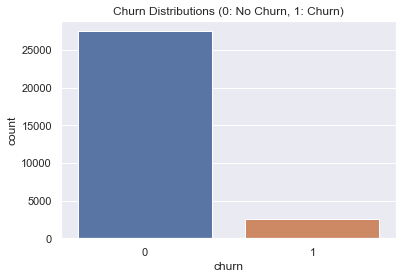

In [57]:
# Class Distributions (No churn vs. churn)
sns.countplot('churn', data=new_df)
plt.title('Churn Distributions (0: No Churn, 1: Churn)')

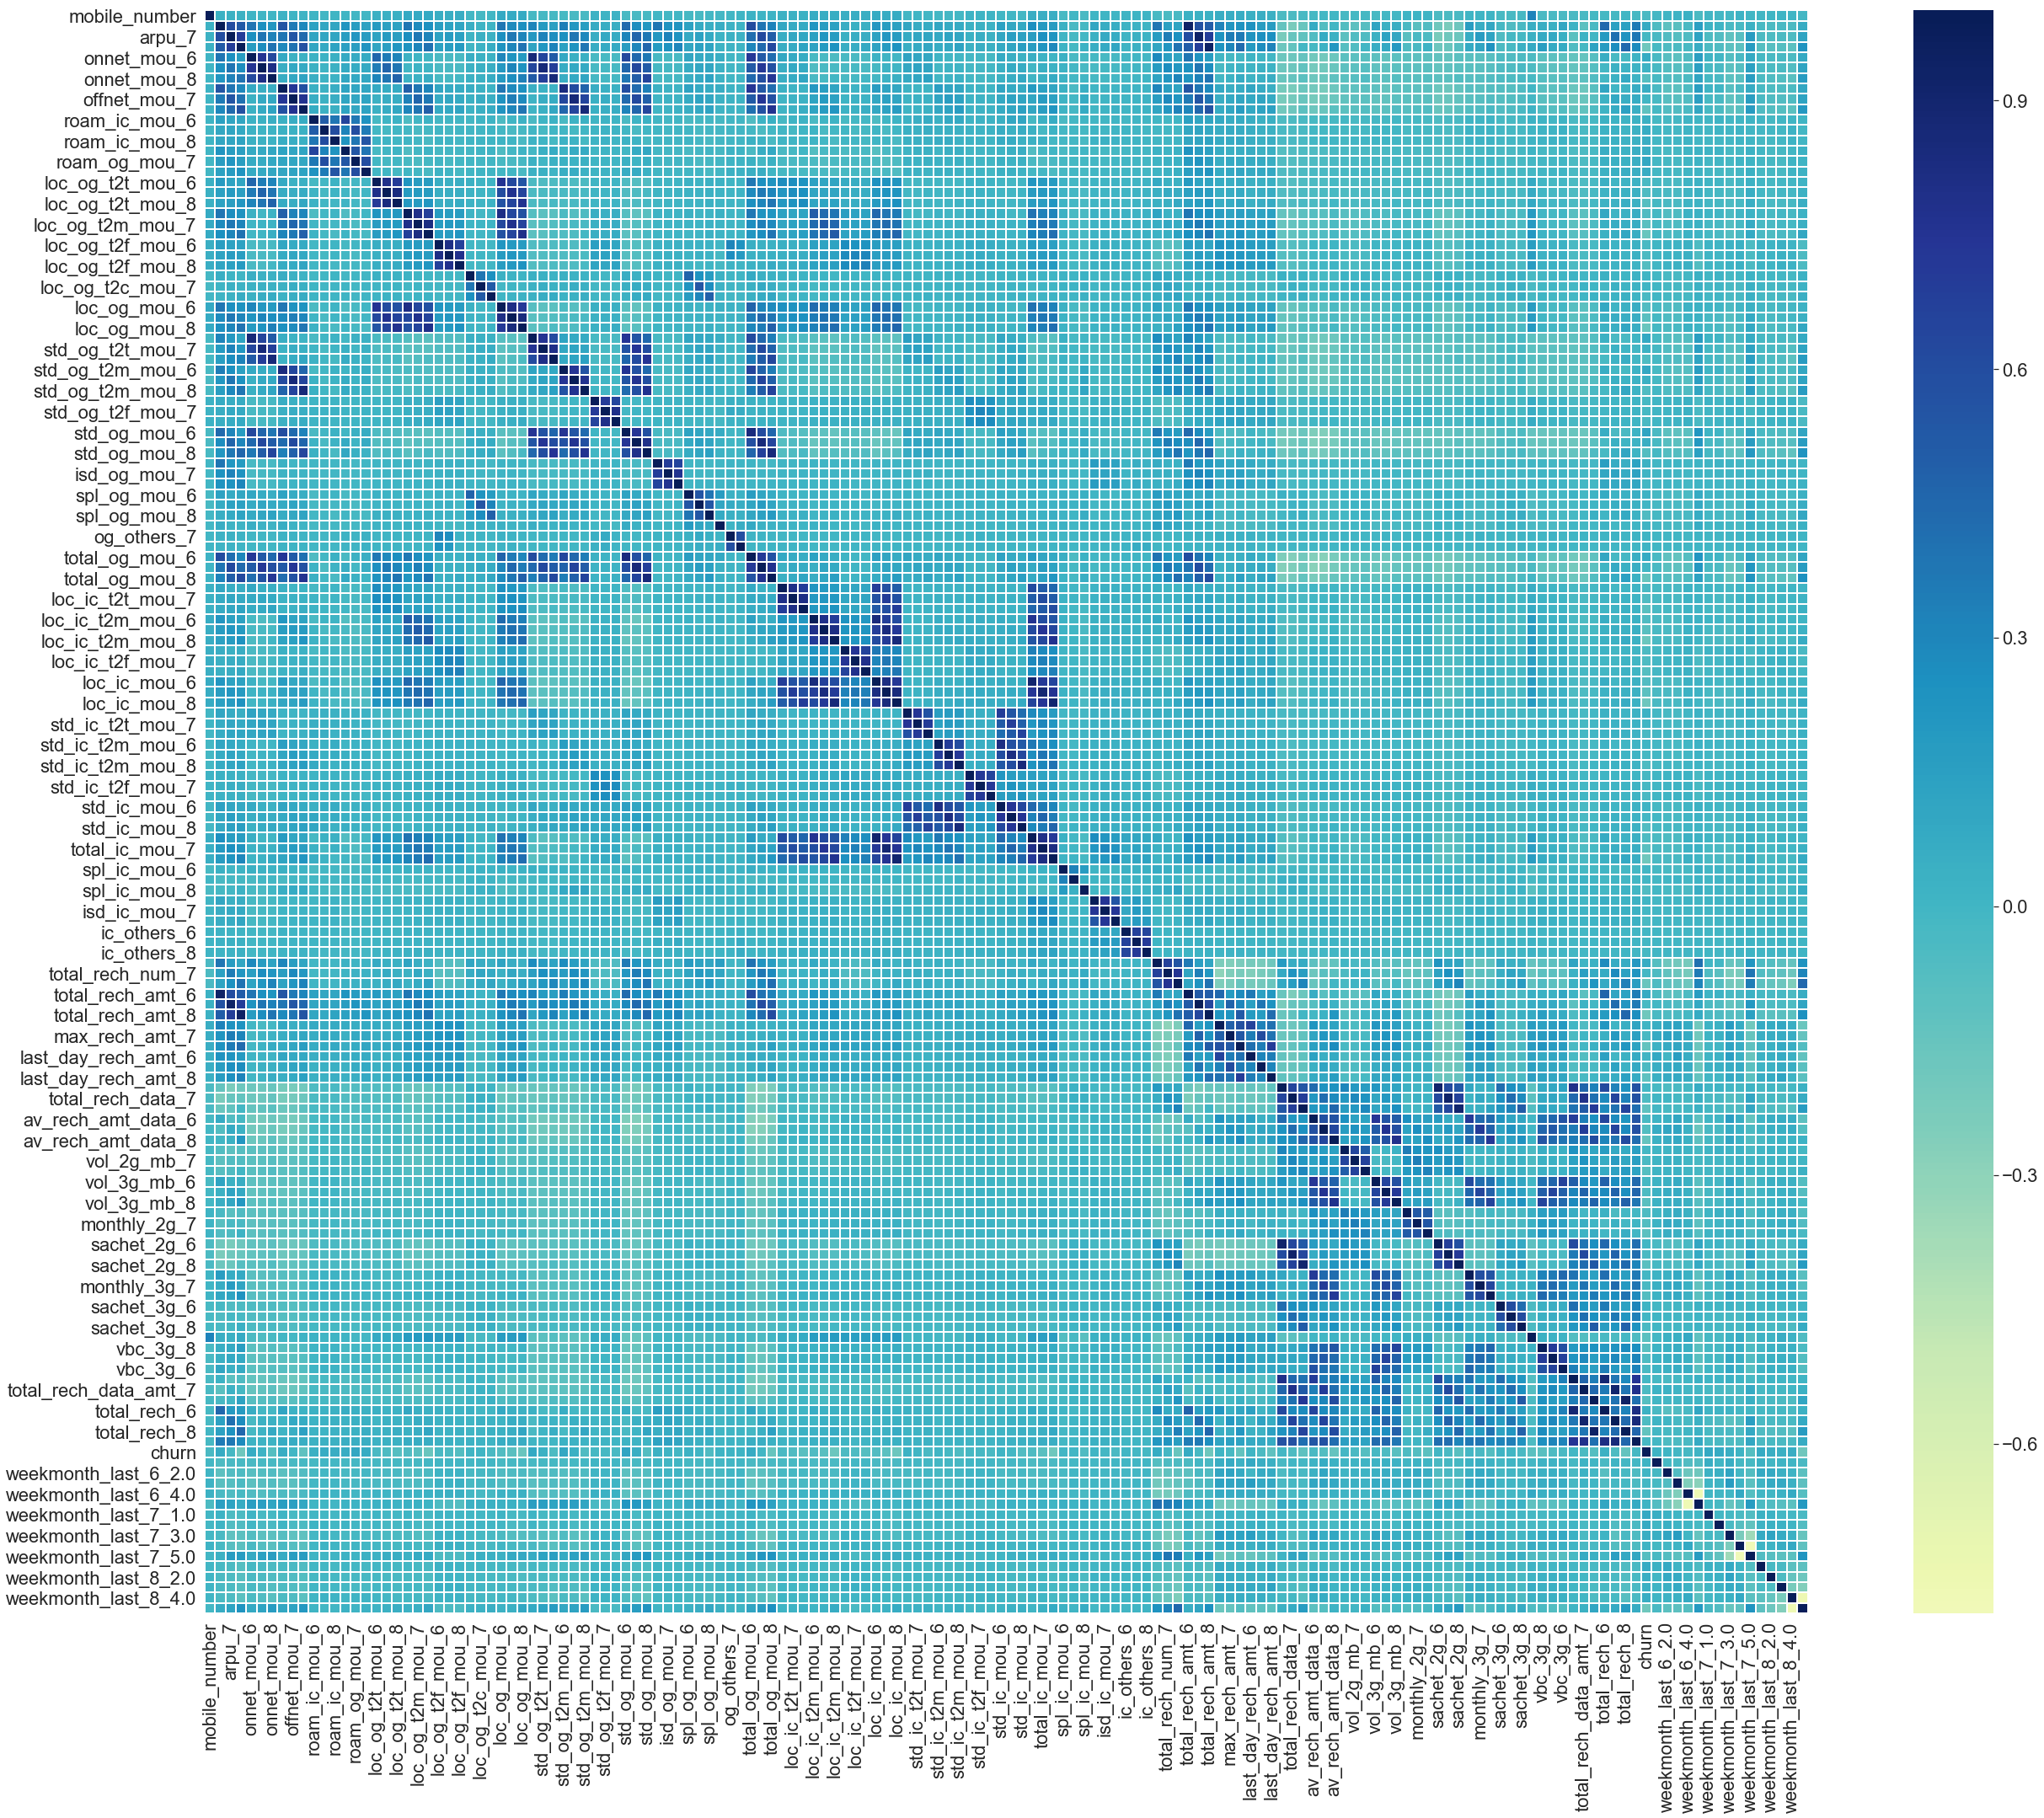

In [58]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(45, 35))
sns.heatmap(new_df.corr(), cmap="YlGnBu", annot = False, linewidths=1, vmax=1, center=0, square=True, cbar_kws={"shrink": 1}, annot_kws={'size': 15}, fmt='.2f', cbar=True)
plt.show()
sns.set(font_scale=1)

In [59]:
# correlation matrix
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = new_df.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

In [60]:
# Highly Correlated columns
corr.shape
cor_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))
cor_triu
cor_triu = cor_triu.stack()
high_corr=pd.DataFrame(cor_triu[cor_triu > 0.80],columns=["corr_value"]).reset_index()
high_corr

level_0           level_1  corr_value
0                  arpu_6  total_rech_amt_6    0.933128
1                  arpu_7  total_rech_amt_7    0.925134
2                  arpu_8  total_rech_amt_8    0.943140
3             onnet_mou_6  std_og_t2t_mou_6    0.859247
4             onnet_mou_7       onnet_mou_8    0.806839
5             onnet_mou_7  std_og_t2t_mou_7    0.860562
6             onnet_mou_8  std_og_t2t_mou_8    0.860827
7            offnet_mou_6  std_og_t2m_mou_6    0.833182
8            offnet_mou_7  std_og_t2m_mou_7    0.857226
9            offnet_mou_8  std_og_t2m_mou_8    0.854013
10       loc_og_t2t_mou_7  loc_og_t2t_mou_8    0.832716
11       loc_og_t2m_mou_6      loc_og_mou_6    0.804614
12       loc_og_t2m_mou_7  loc_og_t2m_mou_8    0.823549
13       loc_og_t2f_mou_6  loc_og_t2f_mou_7    0.808921
14           loc_og_mou_6      loc_og_mou_7    0.806314
15           loc_og_mou_7      loc_og_mou_8    0.841655
16       std_og_t2t_mou_7  std_og_t2t_mou_8    0.803284
17           std_og_mou_6    total_og_mou_6    0.835465
18           std_og_mou_7    total_og_mou_7    0.851054
19           std_og_mou_8    total_og_mou_8    0.852783
20       loc_ic_t2t_mou_6  loc_ic_t2t_mou_7    0.801756
21       loc_ic_t2t_mou_7  loc_ic_t2t_mou_8    0.806806
22       loc_ic_t2m_mou_6      loc_ic_mou_6    0.844966
23       loc_ic_t2m_mou_7  loc_ic_t2m_mou_8    0.812234
24       loc_ic_t2m_mou_7      loc_ic_mou_7    0.835199
25       loc_ic_t2m_mou_8      loc_ic_mou_8    0.848917
26           loc_ic_mou_6      loc_ic_mou_7    0.820805
27           loc_ic_mou_6    total_ic_mou_6    0.896449
28           loc_ic_mou_7      loc_ic_mou_8    0.840017
29           loc_ic_mou_7    total_ic_mou_7    0.884573
30           loc_ic_mou_8    total_ic_mou_8    0.896111
31       std_ic_t2m_mou_6      std_ic_mou_6    0.813976
32       std_ic_t2m_mou_7      std_ic_mou_7    0.819651
33       std_ic_t2m_mou_8      std_ic_mou_8    0.846402
34         total_ic_mou_6    total_ic_mou_7    0.803115
35         total_ic_mou_7    total_ic_mou_8    0.820568
36      total_rech_data_6       sachet_2g_6    0.914953
37      total_rech_data_7       sachet_2g_7    0.920287
38      total_rech_data_8       sachet_2g_8    0.907797
39  total_rech_data_amt_6      total_rech_6    0.885067
40  total_rech_data_amt_7      total_rech_7    0.908790
41  total_rech_data_amt_8      total_rech_8    0.940394
42           total_rech_6  avg_rech_amt_6_7    0.813479
43           total_rech_7  avg_rech_amt_6_7    0.850082

So many features having high correlation more than 80 percent.We are not going to drop this features manually we will use feature reduction method(dimensionality reduction) PCA to do the job.

# Imbalance Class

In [61]:
new_df=pd.read_csv("telecom_churn_data_clean.csv")

In [62]:
new_df=new_df.drop(['mobile_number'], axis=1)

## Feature Scaling

In [63]:
# Standardize numerical features
new_df_scaled_features = new_df.copy()
num_features = new_df_scaled_features.drop(['churn','weekmonth_last_6_1.0', 'weekmonth_last_6_2.0', 'weekmonth_last_6_3.0', 'weekmonth_last_6_4.0',
 'weekmonth_last_6_5.0', 'weekmonth_last_7_1.0', 'weekmonth_last_7_2.0', 'weekmonth_last_7_3.0', 'weekmonth_last_7_4.0', 'weekmonth_last_7_5.0',
 'weekmonth_last_8_1.0', 'weekmonth_last_8_2.0', 'weekmonth_last_8_3.0', 'weekmonth_last_8_4.0', 'weekmonth_last_8_5.0'], axis=1)
scaler = StandardScaler().fit(num_features)
rescaledX = scaler.transform(num_features)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:1,:])

[[-0.869 -0.846 -0.658 -0.569 -0.559 -0.512 -0.777 -0.76  -0.697 -0.211
  -0.167 -0.169 -0.229 -0.21  -0.19  -0.37  -0.357 -0.344 -0.653 -0.676
  -0.65  -0.287 -0.293 -0.302 -0.25  -0.206 -0.237 -0.673 -0.681 -0.65
  -0.412 -0.414 -0.374 -0.439 -0.434 -0.385 -0.151 -0.141 -0.145 -0.571
  -0.57  -0.505 -0.079 -0.083 -0.078 -0.321 -0.325 -0.323 -0.161 -0.016
  -0.017 -0.885 -0.878 -0.789 -0.4   -0.398 -0.393 -0.687 -0.695 -0.662
  -0.334 -0.326 -0.306 -0.735 -0.742 -0.707 -0.192 -0.186 -0.195 -0.297
  -0.292 -0.27  -0.141 -0.144 -0.129 -0.341 -0.331 -0.32  -0.794 -0.795
  -0.76  -0.325 -0.109 -0.24  -0.14  -0.148 -0.155 -0.083 -0.094 -0.096
  -0.834 -0.928 -0.862 -0.594 -0.822 -0.617  0.481  0.453  0.543  1.067
   1.102  1.123 -0.235 -0.279 -0.206  0.685  0.606  0.71  -0.294 -0.375
  -0.322 -0.306 -0.25  -0.275 -0.401 -0.407 -0.378 -0.431 -0.451 -0.42
   1.373  1.284  1.344 -0.229 -0.232 -0.192 -0.253 -0.329 -0.41  -0.133
  -0.172 -0.214 -0.129 -0.428 -0.536 -0.327 -0.582]]


C:\Users\nekumar5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nekumar5\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


The values for each attribute have a mean value of 0 and a standard deviation of 1.

In [64]:
new_df_scaled_features.loc[:, num_features.columns] = rescaledX

In [65]:
new_df_scaled_features.head(10)

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.869247 -0.846183 -0.658410    -0.568588    -0.558638    -0.511676   
1  1.259004  1.983463  6.058420    -0.442484    -0.444669    -0.397277   
2 -0.426564 -0.154606 -0.832006     0.333345     0.173008    -0.434928   
3 -0.095211  0.108481  0.304388    -0.345312    -0.283283    -0.325408   
4 -1.169603 -0.898335 -0.310580    -0.461845    -0.453048    -0.438210   
5 -0.462533 -0.168729 -0.249393    -0.025736     0.733534     0.946224   
6 -0.172405 -0.320289 -0.622152    -0.380239    -0.310858    -0.335690   
7  3.221975  0.054069 -0.736952     3.926337     1.278511    -0.168390   
8  1.036601  1.463537  0.459406    -0.273954    -0.309378    -0.287012   
9 -0.246150 -0.582593 -0.306399    -0.493458    -0.468784    -0.400952   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0     -0.776787     -0.759970     -0.696925      -0.211248   
1      0.165940      0.380541     -0.018528       0.001400   
2     -0.579980     -0.597830     -0.412836      -0.211248   
3      0.799026      1.043179      1.350047      -0.211248   
4     -0.599211     -0.580275     -0.268356      -0.211248   
5     -0.592038     -0.658258     -0.493329      -0.211248   
6     -0.293687     -0.195345     -0.412399      -0.211248   
7      1.484777     -0.240571     -0.555005      -0.211248   
8      0.219747      0.332320     -0.152934      -0.211248   
9     -0.503198     -0.577761     -0.521430      -0.211248   

           ...           weekmonth_last_7_1.0  weekmonth_last_7_2.0  \
0          ...                              0                     0   
1          ...                              0                     0   
2          ...                              0                     0   
3          ...                              0                     0   
4          ...                              1                     0   
5          ...                              0                     0   
6          ...                              0                     0   
7          ...                              0                     0   
8          ...                              0                     0   
9          ...                              0                     0   

   weekmonth_last_7_3.0  weekmonth_last_7_4.0  weekmonth_last_7_5.0  \
0                     1                     0                     0   
1                     0                     1                     0   
2                     0                     0                     1   
3                     0                     0                     1   
4                     0                     0                     0   
5                     0                     1                     0   
6                     0                     1                     0   
7                     0                     1                     0   
8                     0                     0                     1   
9                     0                     0                     1   

   weekmonth_last_8_1.0  weekmonth_last_8_2.0  weekmonth_last_8_3.0  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   
5                     0                     0                     0   
6                     0                     0                     0   
7                     0                     0                     0   
8                     0                     0                     0   
9                     0                     0                     0   

   weekmonth_last_8_4.0  weekmonth_last_8_5.0  
0                     0                     0  
1                     1                     0  
2                

In [66]:
# Separate input features (X) and target variable (y)
X = new_df_scaled_features.drop(['churn'], axis=1)
y = new_df_scaled_features['churn']

##### Splitting the data into train and test

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=100)

### Dummy Classifier

Dummy Classifier to predict Class "0 / No churn" just to show how misleading accuracy can be

In [68]:
# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

### Evaluate Classifier

### Accuracy Score

In [69]:
# checking accuracy
print('Accuracy score on test set: {:.3f}'.format(accuracy_score(y_test, dummy_pred)))

Accuracy score on test set: 0.917


We have not yet trained the model and got an accuracy score of 91.7%.

## Implementing Logistic Regression with imbalanced class

In [70]:
# Model Fitting
logreg = LogisticRegression(random_state=100)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=100, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
logreg_pred = logreg.predict(X_test)

### Evaluate Model - Logistic Regression with imbalanced class

### Accuracy Score

In [72]:
# check accuracy
print('Accuracy score on test set: {:.3f}'.format(accuracy_score(y_test, logreg_pred)))

Accuracy score on test set: 0.932


In [73]:
cm=confusion_matrix(y_test,logreg_pred)
print(cm)

[[8120  130]
 [ 486  260]]


- The two numbers 8120 and 260 are the correct predictions
- Numbers 486 and 130 are the incorrect predictions

### Classification Report

In [74]:
report = classification_report(y_test, logreg_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8250
           1       0.67      0.35      0.46       746

   micro avg       0.93      0.93      0.93      8996
   macro avg       0.81      0.67      0.71      8996
weighted avg       0.92      0.93      0.92      8996



F1 score is not that impressive,recall ia also not good.

The accuracy is too good. This model is completely ignoring the minority class (1 = churn) in favor of the majority class (0 = No churn). Accuracy might not be our best option for measuring performance. Using accuracy as a metric can classify everything into the majority class and give you a very high accuracy.
Required to balance the dataset

# Balanced Dataset

## 1. Up-sample Minority Class

In [75]:
# Separate input features (X) and target variable (y)
X = new_df_scaled_features.drop(['churn'], axis=1)
y = new_df_scaled_features['churn']

In [76]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=100)

In [77]:
# concatenate the training data back together
X = pd.concat([X_train, y_train], axis=1)

In [78]:
# Separate majority and minority classes
new_df_majority = X[X.churn==0]
new_df_minority = X[X.churn==1]

In [79]:
# Upsample minority class
new_df_minority_upsampled = resample(new_df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(new_df_majority),    # to match majority class
                                 random_state=100) # reproducible results
 
# Combine majority class with upsampled minority class
new_df_upsampled = pd.concat([new_df_majority, new_df_minority_upsampled])
 
# Display new class counts
new_df_upsampled.churn.value_counts()

1    19222
0    19222
Name: churn, dtype: int64

The ratio of the two classes is now 1:1.

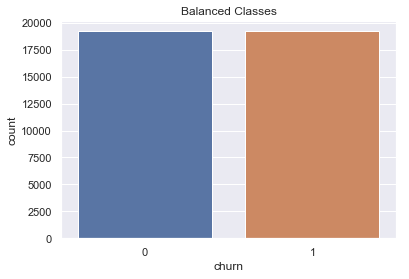

In [80]:
# Plot Balanced Class No churn vs churn
sns.countplot('churn', data=new_df_upsampled)
plt.title('Balanced Classes')
plt.show()

## Implementing Logistic Regression with Up-Sampling

In [81]:
X_train = new_df_upsampled.drop('churn', axis=1)
y_train = new_df_upsampled.churn

logreg_up = LogisticRegression(random_state=100)
logreg_up.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=100, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [82]:
logreg_up_pred = logreg_up.predict(X_test)

### Evaluate Model - Logistic Regression with Up-Sampling

### Accuracy Score

In [83]:
# check accuracy
print('Accuracy score on test set: {:.3f}'.format(accuracy_score(y_test, logreg_up_pred)))

Accuracy score on test set: 0.823


### Confusion Matrix 

In [84]:
cm=confusion_matrix(y_test,logreg_up_pred)
print(cm)

[[6770 1480]
 [ 108  638]]


- The two numbers 6770 and 638 are the correct predictions
- Numbers 108 and 1480 are the incorrect predictions

### Classification Report

In [85]:
report = classification_report(y_test, logreg_up_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      8250
           1       0.30      0.86      0.45       746

   micro avg       0.82      0.82      0.82      8996
   macro avg       0.64      0.84      0.67      8996
weighted avg       0.93      0.82      0.86      8996



F1 score is getting better with balanced class and recall score is also looking fine.Overall its not good as (127+1476) incorrect prediction.Dummy model checking with the balanced class

## 2. Up-Sample Minority Clas with SMOTE /  Generate Synthetic Samples¶

SMOTE (Synthetic Minority Over-sampling Technique) is similar to Oversampling but it uses a nearest neighbors algorithm to generate new and synthetic data. With this data we can train our model. This is a most common technique.

In [86]:
# Separate input features (X) and target variable (y)
X = new_df_scaled_features.drop(['churn'], axis=1)
y = new_df_scaled_features['churn']

In [87]:
# Splitting the data into train and test
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=100)

In [88]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100, ratio=1.0)
X_train_smote, y_train_smote = sm.fit_sample(X_train_smote, y_train_smote)

In [89]:
np.bincount(y_train_smote)

array([19222, 19222], dtype=int64)

## Implementing Logistic Regression with SMOTE / Generate Synthetic Samples

In [90]:
logreg_smote = LogisticRegression(random_state=100, n_jobs=-1)
logreg_smote.fit(X_train_smote, y_train_smote)

C:\Users\nekumar5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=100, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
logreg_smote_pred = logreg_smote.predict(X_test_smote)

### Evaluate Model - Logistic Regression with SMOTE / Generate Synthetic Samples

### Accuracy Score

In [92]:
# check accuracy
print('Accuracy score on test set: {:.3f}'.format(accuracy_score(y_test, logreg_up_pred)))

Accuracy score on test set: 0.823


### Confusion Matrix

In [93]:
cm=confusion_matrix(y_test_smote,logreg_smote_pred)
print(cm)

[[6892 1358]
 [ 120  626]]


- The two numbers 6892 and 626 are the correct predictions
- Numbers 120 and 1358 are the incorrect predictions

### Classification Report 

In [94]:
report = classification_report(y_test_smote, logreg_smote_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      8250
           1       0.32      0.84      0.46       746

   micro avg       0.84      0.84      0.84      8996
   macro avg       0.65      0.84      0.68      8996
weighted avg       0.93      0.84      0.87      8996



Same result with the simple Up Sampling technique.Accuracy is same in both the imbalanced technique but recall is good with simple Up Sampling technique so will proceed with Sampling Technique that our business goal.

# Feature Reduction Using PCA

## Model Building

In [95]:
X_train = new_df_upsampled.drop('churn', axis=1)
y_train = new_df_upsampled.churn

### Running Your First Training Model

### PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [96]:
X_train.shape
# We have 152 variables

(38444, 152)

In [97]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [98]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [99]:
pca.components_

array([[ 5.211e-02,  5.394e-02,  4.347e-02, ..., -2.763e-04, -3.061e-03,
         5.175e-03],
       [ 1.824e-01,  1.934e-01,  1.406e-01, ..., -2.232e-03, -6.399e-03,
         2.042e-02],
       [ 6.224e-02,  1.071e-01,  1.566e-01, ...,  1.450e-03, -5.951e-03,
         1.268e-02],
       ...,
       [ 0.000e+00, -1.947e-16,  1.646e-16, ...,  1.196e-17,  9.985e-17,
         2.708e-17],
       [-0.000e+00,  2.777e-17, -7.289e-17, ..., -6.631e-17, -7.656e-17,
        -1.031e-16],
       [-0.000e+00, -1.961e-16,  4.243e-17, ...,  1.336e-16,  7.957e-17,
        -5.176e-18]])

In [100]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1       PC2      Feature
0  0.052107  0.182427       arpu_6
1  0.053944  0.193396       arpu_7
2  0.043471  0.140624       arpu_8
3  0.007571  0.171209  onnet_mou_6
4  0.009384  0.169035  onnet_mou_7

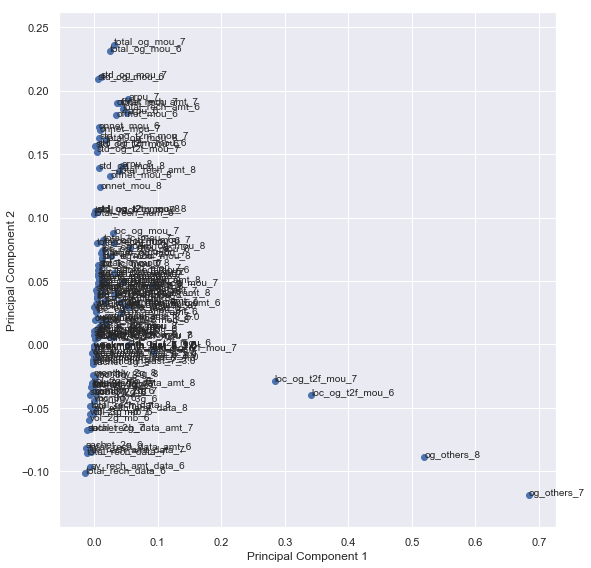

In [101]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Looking at the screeplot to assess the number of needed principal components

In [102]:
pca.explained_variance_ratio_

array([1.465e-01, 8.903e-02, 6.721e-02, 5.378e-02, 4.920e-02, 3.503e-02,
       3.337e-02, 2.997e-02, 2.934e-02, 2.588e-02, 2.025e-02, 1.814e-02,
       1.631e-02, 1.553e-02, 1.463e-02, 1.401e-02, 1.366e-02, 1.313e-02,
       1.206e-02, 1.140e-02, 1.097e-02, 1.066e-02, 1.015e-02, 9.911e-03,
       9.638e-03, 8.742e-03, 8.120e-03, 8.036e-03, 7.773e-03, 7.134e-03,
       6.810e-03, 6.713e-03, 6.561e-03, 6.416e-03, 6.179e-03, 5.883e-03,
       5.653e-03, 5.506e-03, 5.404e-03, 5.177e-03, 5.003e-03, 4.917e-03,
       4.760e-03, 4.710e-03, 4.600e-03, 4.482e-03, 4.292e-03, 3.815e-03,
       3.560e-03, 3.536e-03, 3.308e-03, 3.235e-03, 3.001e-03, 2.949e-03,
       2.856e-03, 2.833e-03, 2.689e-03, 2.558e-03, 2.526e-03, 2.491e-03,
       2.374e-03, 2.317e-03, 2.292e-03, 2.246e-03, 2.207e-03, 2.162e-03,
       2.150e-03, 2.096e-03, 2.017e-03, 1.954e-03, 1.942e-03, 1.917e-03,
       1.840e-03, 1.756e-03, 1.712e-03, 1.680e-03, 1.591e-03, 1.574e-03,
       1.515e-03, 1.505e-03, 1.406e-03, 1.379e-03, 

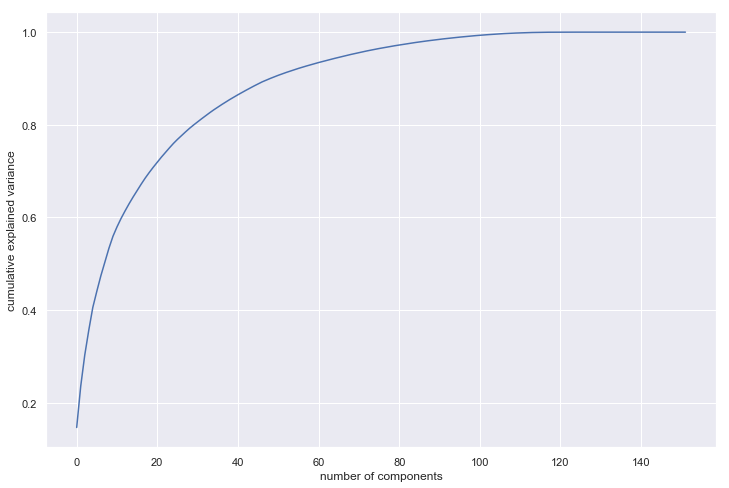

In [103]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 55 components are enough to describe 95% of the variance in the dataset
- We'll choose 55 components for our modeling

In [104]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=55)

#### Basis transformation - getting the data onto our PCs

In [105]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(38444, 55)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [106]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

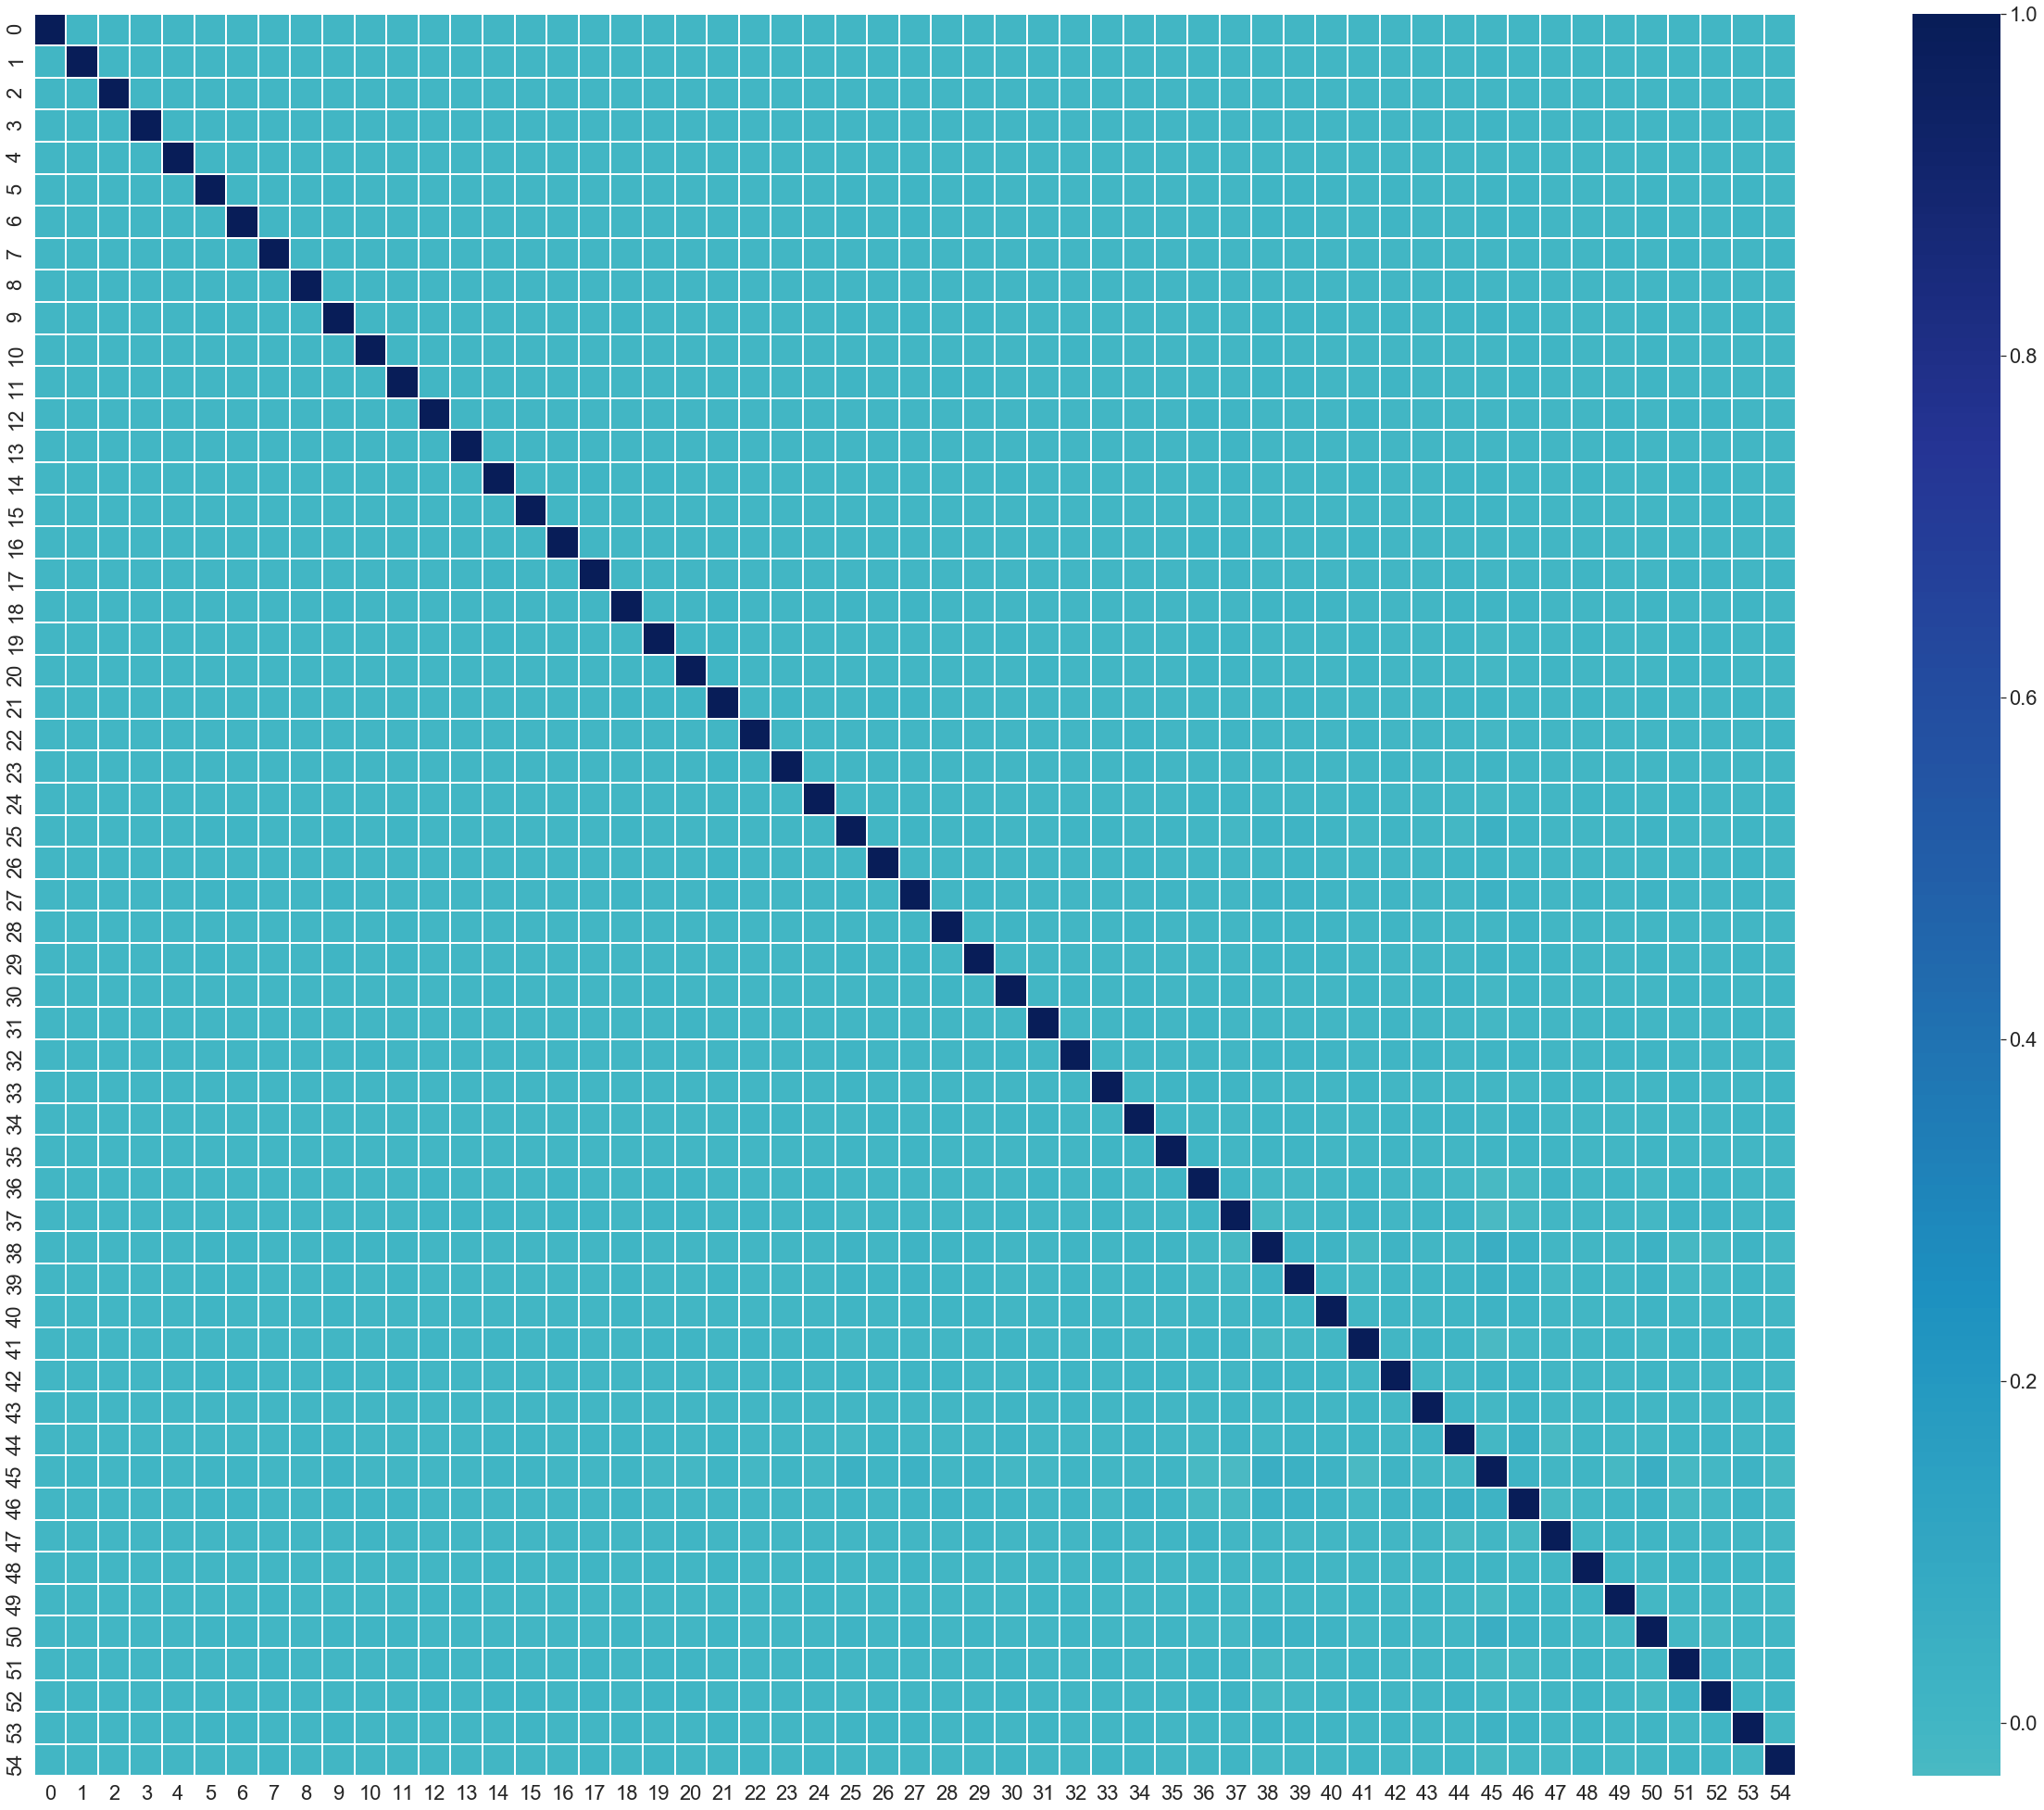

In [107]:
#plotting the correlation matrix
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(45, 35))
sns.heatmap(corrmat, cmap="YlGnBu", annot = False, linewidths=1, vmax=1, center=0, square=True, cbar_kws={"shrink": 1}, annot_kws={'size': 15}, fmt='.2f', cbar=True)
plt.show()
sns.set(font_scale=1)

In [108]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.05240575487033736 , min corr:  -0.03128785136271545


#### Indeed - there is no correlation between any two components! Good job, PCA!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [109]:
#Applying selected components to the test data - 55 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8996, 55)

#### Applying a logistic regression on our Principal Components
- We expect to get similar model performance with significantly lower features
- If we can do so, we would have done effective dimensionality reduction without losing any import information

In [110]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

**Note**

Note that we are fitting the original variable y with the transformed variables (principal components). This is not a problem becuase the transformation done in PCA is *linear*, which implies that you've only changed the way the new x variables are represented, though the nature of relationship between X and Y is still linear. 

In [111]:
from sklearn.metrics import mean_squared_error, r2_score
# Predicted probabilities
y_pred = model_pca.predict(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred))
# Printing confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred),'\n')
print("Classification Report")
report = classification_report(y_test, y_pred)
print(report,'\n')

Mean squared error: 0.19
R2 score: -1.54
LogisticRegression accuracy with PCA:  0.8068030235660294
Confusion Matrix
[[6622 1628]
 [ 110  636]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8250
           1       0.28      0.85      0.42       746

   micro avg       0.81      0.81      0.81      8996
   macro avg       0.63      0.83      0.65      8996
weighted avg       0.93      0.81      0.85      8996
 



#### Impressive! The same result, without all the hard work on feature selection!

Why not take it a step further and get a little more 'unsupervised' in our approach?
This time, we'll let PCA select the number of components basen on a variance cutoff we provide

In [112]:
pca_again = PCA(0.95)

In [113]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape
# we see that PCA selected 67 components

(38444, 69)

In [114]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [115]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(8996, 69)

In [151]:
from sklearn.metrics import mean_squared_error, r2_score
# Predicted probabilities
y_pred_pca = model_pca2.predict(df_test_pca2)
# Converting y_pred_pca to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred_pca)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_pca))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred_pca))
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred_pca))
# Printing confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_pca),'\n')
print("Classification Report")
report = classification_report(y_test, y_pred_pca)
print(report,'\n')

Mean squared error: 0.19
R2 score: -1.50
LogisticRegression accuracy with PCA:  0.8102489995553579
Confusion Matrix
[[6645 1605]
 [ 102  644]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8250
           1       0.29      0.86      0.43       746

   micro avg       0.81      0.81      0.81      8996
   macro avg       0.64      0.83      0.66      8996
weighted avg       0.93      0.81      0.85      8996
 



#### So there it is - a very similar result, without all the hassles. We have not only achieved dimensionality reduction, but also saved a lot of effort on feature selection.

#### Before closing, let's also visualize the data to see if we can spot any patterns

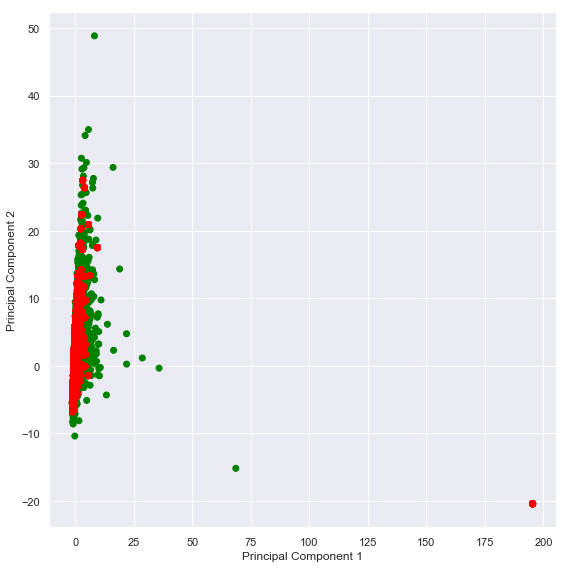

In [117]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca2[:,0], df_train_pca2[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

Looks like there is a good amount of separation in 2D, but probably not enough

Let's look at it in 3D, and we expect spread to be better (dimensions of variance, remember?)

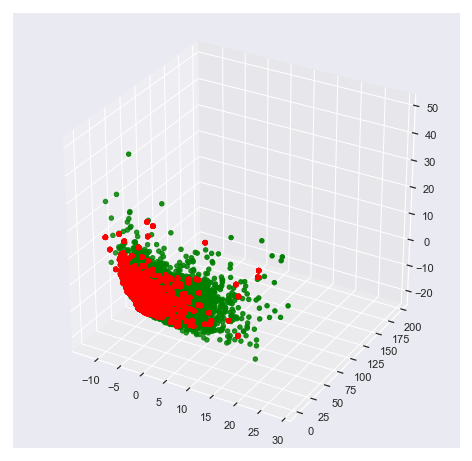

In [118]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.scatter(df_train_pca2[:,2], df_train_pca2[:,0], df_train_pca2[:,1], c=y_train.map({0:'green',1:'red'}))

# Hyperparameter Tuning

#### Hyperparameter Tunning is commented as it takes heavy computing power and time

In [119]:
# from sklearn.model_selection import KFold
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# # creating a KFold object with 5 splits 
# folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# # specify range of hyperparameters
# # Set the parameters by cross-validation
# hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]}]


# # specify model
# model = SVC(kernel="rbf")

# # set up GridSearchCV()
# model_cv = GridSearchCV(estimator = model, 
#                         param_grid = hyper_params, 
#                         scoring= 'accuracy', 
#                         cv = folds, 
#                         verbose = 1,
#                         return_train_score=True)      

# # fit the model
# model_cv.fit(X_train, y_train)

In [120]:
# # cv results
# cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results

In [121]:
# # converting C to numeric type for plotting on x-axis
# cv_results['param_C'] = cv_results['param_C'].astype('int')

# # # plotting
# plt.figure(figsize=(16,6))

# # subplot 1/3
# plt.subplot(131)
# gamma_01 = cv_results[cv_results['param_gamma']==0.01]

# plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
# plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
# plt.xlabel('C')
# plt.ylabel('Accuracy')
# plt.title("Gamma=0.01")
# plt.ylim([0.80, 1])
# plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
# plt.xscale('log')

# # subplot 2/3
# plt.subplot(132)
# gamma_001 = cv_results[cv_results['param_gamma']==0.001]

# plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
# plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
# plt.xlabel('C')
# plt.ylabel('Accuracy')
# plt.title("Gamma=0.001")
# plt.ylim([0.80, 1])
# plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
# plt.xscale('log')


# # subplot 3/3
# plt.subplot(133)
# gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

# plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
# plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
# plt.xlabel('C')
# plt.ylabel('Accuracy')
# plt.title("Gamma=0.0001")
# plt.ylim([0.80, 1])
# plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
# plt.xscale('log')

This plot reveals some interesting insights:
- **High values of gamma** lead to **overfitting** (especially at high values of C); note that the training accuracy at gamma=0.01 and C=100 reaches almost 92% 
- The **training score increases with higher gamma**, though the **test scores are comparable** (at sufficiently high cost, i.e. C > 10)
- The least amount of overfitting (i.e. difference between train and test accuracy) occurs at low gamma, i.e. a quite *simple non-linear model*


In [ ]:
# # printing the optimal accuracy score and hyperparameters
# best_score = model_cv.best_score_
# best_hyperparams = model_cv.best_params_

# print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

In [ ]:
# model = SVC(C=100, gamma=0.01,kernel="rbf")
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# print(metrics.confusion_matrix(y_test,y_pred),"\n")
# print('Accuracy:-' , metrics.accuracy_score(y_test,y_pred))
# print('precision:-' , metrics.precision_score(y_test,y_pred))
# print('recall:-' , metrics.recall_score(y_test,y_pred))

# Using other techniques to work with imbalanced data.

In [122]:
import xgboost as xgboost
from xgboost import plot_importance
from xgboost import XGBClassifier

# XGBoost Model

XGBoost Model worked well with imbalanced data

In [123]:
X = new_df_scaled_features.drop(['churn'], axis=1)
y = new_df_scaled_features['churn']

In [124]:
# Split into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [125]:
xgb = XGBClassifier(random_state = 100, n_jobs = -1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [126]:
xgb_pred = xgb.predict(X_test)

### Evaluate Model - XGBoost Model

### Accuracy Score

In [127]:
# check accuracy
print('Accuracy score on test set: {:.3f}'.format(accuracy_score(y_test,xgb_pred)))

Accuracy score on test set: 0.945


### Confusion Matrix

In [128]:
cm=confusion_matrix(y_test,xgb_pred)
print(cm)

[[8106  144]
 [ 351  395]]


- The two numbers 8106 an 395 are the correct predictions
- Numbers 351 and 144 are the incorrect predictions

### Classification Report

In [129]:
report = classification_report(y_test, xgb_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8250
           1       0.73      0.53      0.61       746

   micro avg       0.94      0.94      0.94      8996
   macro avg       0.85      0.76      0.79      8996
weighted avg       0.94      0.94      0.94      8996



The f1-score getting better. Now, we try to improve the score with optimization.

# XGBoost with Optimization

 Fix learning rate and number of estimators for tuning tree-based parameters

In order to decide on boosting parameters, we need to set some initial values of other parameters. Lets take the following values:
max_depth = 5
min_child_weight = 1
gamma = 0
subsample, colsample_bytree = 0.8
scale_pos_weight = 1

### Tune max_depth and min_child_weight

In [130]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [131]:
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([27.275, 24.422, 25.104, 37.517, 36.538, 36.069, 50.432, 49.255,
         49.237, 64.768, 61.431, 55.96 ]),
  'std_fit_time': array([1.184, 0.482, 1.496, 1.041, 0.42 , 0.415, 0.363, 0.229, 1.158,
         1.538, 0.504, 4.052]),
  'mean_score_time': array([0.123, 0.068, 0.069, 0.08 , 0.071, 0.074, 0.088, 0.092, 0.085,
         0.105, 0.101, 0.083]),
  'std_score_time': array([0.032, 0.004, 0.005, 0.009, 0.003, 0.004, 0.007, 0.008, 0.009,
         0.003, 0.009, 0.018]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5, 1, 3, 5],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
        

The ideal values are 5 for max_depth and 5 for min_child_weight.

In [132]:
optimized_GBM_pred = gsearch1.predict(X_test)

In [136]:
# check accuracy
print('Accuracy score on test set: {:.3f}'.format(accuracy_score(y_test,optimized_GBM_pred)))
cm=confusion_matrix(y_test,optimized_GBM_pred)
print(cm)
predicted = optimized_GBM_pred
report = classification_report(y_test, predicted)
print(report)

Accuracy score on test set: 0.947
[[8091  159]
 [ 318  428]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8250
           1       0.73      0.57      0.64       746

   micro avg       0.95      0.95      0.95      8996
   macro avg       0.85      0.78      0.81      8996
weighted avg       0.94      0.95      0.94      8996



Lets go one step deeper and look for optimum values. We’ll search for values 1 above and below the optimum values because we took an interval of two.

In [137]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': [4, 5, 6], 'min_child_weight': [4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [138]:
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([30.074, 27.97 , 27.742, 33.915, 34.419, 41.902, 53.284, 53.689,
         52.171]),
  'std_fit_time': array([1.08 , 0.566, 0.351, 0.271, 1.686, 2.741, 0.416, 0.516, 0.891]),
  'mean_score_time': array([0.07 , 0.065, 0.071, 0.073, 0.079, 0.091, 0.106, 0.099, 0.097]),
  'std_score_time': array([0.003, 0.007, 0.005, 0.007, 0.015, 0.013, 0.011, 0.01 , 0.009]),
  'param_max_depth': masked_array(data=[4, 4, 4, 5, 5, 5, 6, 6, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 4, 'min_child_weight': 4},
   {'max_depth': 4, 'min_child_weight': 5},
   {'max_depth': 4, 'min_child_weight': 6},
   {'max_de

Here, we get the optimum values as 4 for max_depth and 6 for min_child_weight.

In [140]:
optimized_GBM_pred = gsearch2.predict(X_test)

In [141]:
# check accuracy
print('Accuracy score on test set: {:.3f}'.format(accuracy_score(y_test,optimized_GBM_pred)))
cm=confusion_matrix(y_test,optimized_GBM_pred)
print(cm)
predicted = optimized_GBM_pred
report = classification_report(y_test, predicted)
print(report)

Accuracy score on test set: 0.946
[[8089  161]
 [ 324  422]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8250
           1       0.72      0.57      0.64       746

   micro avg       0.95      0.95      0.95      8996
   macro avg       0.84      0.77      0.80      8996
weighted avg       0.94      0.95      0.94      8996



### Tune Gamma

In [142]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=6, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=6, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [143]:
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([35.739, 38.211, 38.027, 36.422, 55.412]),
  'std_fit_time': array([ 0.904,  0.26 ,  0.305,  0.895, 37.193]),
  'mean_score_time': array([0.083, 0.083, 0.084, 0.076, 0.081]),
  'std_score_time': array([0.01 , 0.005, 0.007, 0.012, 0.024]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.934, 0.933, 0.934, 0.934, 0.933]),
  'split1_test_score': array([0.938, 0.938, 0.94 , 0.936, 0.937]),
  'split2_test_score': array([0.933, 0.933, 0.933, 0.933, 0.933]),
  'split3_test_score': array([0.945, 0.945, 0.946, 0.946, 0.945]),
  'split4_test_score': array([0.941, 0.941, 0.941, 0.941, 0.942]),
  'mean_test_score': array([0.938, 0.938, 0.939, 0.938, 0.938]),
  'std_test_score': array([0.004, 0.005, 0.005, 0.005, 0.

This shows that our value of gamma, i.e. 0.2 is the optimum one.

In [144]:
optimized_GBM_pred = gsearch3.predict(X_test)

In [145]:
# check accuracy
print('Accuracy score on test set: {:.3f}'.format(accuracy_score(y_test,optimized_GBM_pred)))
cm=confusion_matrix(y_test,optimized_GBM_pred)
print(cm)
predicted = optimized_GBM_pred
report = classification_report(y_test, predicted)
print(report)

Accuracy score on test set: 0.946
[[8089  161]
 [ 324  422]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8250
           1       0.72      0.57      0.64       746

   micro avg       0.95      0.95      0.95      8996
   macro avg       0.84      0.77      0.80      8996
weighted avg       0.94      0.95      0.94      8996



### Tune subsample and colsample_bytree

In [147]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=6, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=6, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [148]:
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([22.785, 23.638, 23.589, 24.6  , 26.213, 26.995, 26.547, 25.613,
         27.983, 28.117, 28.483, 28.701, 29.693, 30.108, 30.945, 30.741]),
  'std_fit_time': array([0.194, 0.27 , 0.506, 0.566, 0.197, 0.291, 0.918, 0.418, 0.244,
         0.217, 0.345, 0.31 , 0.296, 0.623, 0.588, 0.743]),
  'mean_score_time': array([0.093, 0.076, 0.09 , 0.077, 0.081, 0.081, 0.083, 0.073, 0.093,
         0.075, 0.079, 0.069, 0.077, 0.073, 0.083, 0.075]),
  'std_score_time': array([0.005, 0.011, 0.013, 0.013, 0.005, 0.008, 0.008, 0.012, 0.026,
         0.007, 0.003, 0.012, 0.006, 0.018, 0.012, 0.012]),
  'param_colsample_bytree': masked_array(data=[0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.8, 0.8, 0.8,
                     0.8, 0.9, 0.9, 0.9, 0.9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_

Optimal value for colsample_bytree 0.9 subsample 0.6

In [149]:
optimized_GBM_pred = gsearch4.predict(X_test)

In [150]:
# check accuracy
print('Accuracy score on test set: {:.3f}'.format(accuracy_score(y_test,optimized_GBM_pred)))
cm=confusion_matrix(y_test,optimized_GBM_pred)
print(cm)
predicted = optimized_GBM_pred
report = classification_report(y_test, predicted)
print(report)

Accuracy score on test set: 0.945
[[8095  155]
 [ 337  409]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8250
           1       0.73      0.55      0.62       746

   micro avg       0.95      0.95      0.95      8996
   macro avg       0.84      0.76      0.80      8996
weighted avg       0.94      0.95      0.94      8996



### Tuning Regularization Parameters

In [153]:
param_test5 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=6, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=6, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [154]:
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([34.222, 36.523, 34.704, 34.858, 40.473]),
  'std_fit_time': array([0.929, 0.48 , 2.086, 1.103, 6.268]),
  'mean_score_time': array([0.083, 0.077, 0.082, 0.078, 0.085]),
  'std_score_time': array([0.008, 0.015, 0.018, 0.01 , 0.017]),
  'param_reg_alpha': masked_array(data=[0, 0.001, 0.005, 0.01, 0.05],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0},
   {'reg_alpha': 0.001},
   {'reg_alpha': 0.005},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.05}],
  'split0_test_score': array([0.934, 0.934, 0.934, 0.933, 0.933]),
  'split1_test_score': array([0.94 , 0.94 , 0.939, 0.94 , 0.937]),
  'split2_test_score': array([0.933, 0.933, 0.933, 0.933, 0.933]),
  'split3_test_score': array([0.946, 0.946, 0.946, 0.946, 0.947]),
  'split4_test_score': array([0.941, 0.941, 0.942, 0.941, 0.939]),
  'mean_test_score': array([0.939, 0.939, 0.939, 0.939, 0.938]),
  'std_test_score': array([0.0

In [155]:
optimized_GBM_pred = gsearch5.predict(X_test)

In [156]:
# check accuracy
print('Accuracy score on test set: {:.3f}'.format(accuracy_score(y_test,optimized_GBM_pred)))
cm=confusion_matrix(y_test,optimized_GBM_pred)
print(cm)
predicted = optimized_GBM_pred
report = classification_report(y_test, predicted)
print(report)

Accuracy score on test set: 0.946
[[8089  161]
 [ 324  422]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8250
           1       0.72      0.57      0.64       746

   micro avg       0.95      0.95      0.95      8996
   macro avg       0.84      0.77      0.80      8996
weighted avg       0.94      0.95      0.94      8996



### Reducing Learning Rate

In [160]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=6, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=6, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [161]:
xgb_pred = xgb.predict(X_test)

In [162]:
# check accuracy
print('Accuracy score on test set: {:.3f}'.format(accuracy_score(y_test,xgb_pred)))
cm=confusion_matrix(y_test,xgb_pred)
print(cm)
predicted = xgb_pred
report = classification_report(y_test, predicted)
print(report)

Accuracy score on test set: 0.947
[[8089  161]
 [ 320  426]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8250
           1       0.73      0.57      0.64       746

   micro avg       0.95      0.95      0.95      8996
   macro avg       0.84      0.78      0.81      8996
weighted avg       0.94      0.95      0.94      8996



# <a id='6'> Model Performances</a>
## <a id='6.1'> model performance metrics</a>

### Model using Logistic Regression using PCA

In [152]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_pca))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred_pca))
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred_pca))
# Printing confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_pca),'\n')
print("Classification Report")
report = classification_report(y_test, y_pred_pca)
print(report,'\n')

Mean squared error: 0.19
R2 score: -1.50
LogisticRegression accuracy with PCA:  0.8102489995553579
Confusion Matrix
[[6645 1605]
 [ 102  644]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8250
           1       0.29      0.86      0.43       746

   micro avg       0.81      0.81      0.81      8996
   macro avg       0.64      0.83      0.66      8996
weighted avg       0.93      0.81      0.85      8996
 



### Model SVM

Following is out put after running SVM with hyper parameter tuning (C = 100 , gamma= 0.01)

Accuracy:- 0.9225343693962941
precision:- 0.334070796460177
recall:- 0.3032128514056225

Confusion matrix is as follows

[[7566  301]<br>
 [ 347  151]] 
 
 
- The two numbers 7566 and 151 are the correct predictions
- Numbers 301 and 347 are the incorrect predictions

### Model XGBoost

In [163]:
# check accuracy
print('Accuracy score on test set: {:.3f}'.format(accuracy_score(y_test,xgb_pred)))
cm=confusion_matrix(y_test,xgb_pred)
print(cm)
predicted = xgb_pred
report = classification_report(y_test, predicted)
print(report)

Accuracy score on test set: 0.947
[[8089  161]
 [ 320  426]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8250
           1       0.73      0.57      0.64       746

   micro avg       0.95      0.95      0.95      8996
   macro avg       0.84      0.78      0.81      8996
weighted avg       0.94      0.95      0.94      8996



# Conclusion

Based on the models we have built, we found that the Logistic Regression Model along with PCA gives the best results as per the metrics we want.

As the main objective is to predict the churners (with more importance given to identify churners than the non-churners accurately) we concentrated on the Recall metric and Tuned the hyper parameters which improves the recall score. Although we concentrate more on recall we kept an eye on other metrics like accuracy as well.

Below are the final scores we have to the model we selected:

Model: Logistic Regression with PCA
PCA: tuned to get components which explains 95% of the variance

Results- 
Recall: 0.86<br>
Accuracy: 0.81
 
confusion matrix - 

    [[6645 1605]
     [ 102  644]] 
    